In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta, datetime
import re
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import confusion_matrix
from scipy.stats import norm

In [2]:
expidia_df = pd.read_csv('expediaHotelsClean.csv')
expidia_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price_usd,1866.0,966.969453,442.912397,142.0,661.0,985.0,1244.75,4407.0
is_breakfast_included,1866.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
rating,1866.0,8.720257,0.394040,8.0,8.4,8.8,9.00,9.2
verbal_rating,1866.0,3.106645,0.774866,2.0,2.0,3.0,4.00,4.0
review_count,1866.0,1713.088960,1132.850939,301.0,1012.0,1331.0,1773.00,4699.0
length_of_stay,1866.0,3.364952,1.368051,1.0,2.0,4.0,5.00,5.0
time_to_travel,1866.0,15.484459,8.807201,1.0,7.0,16.0,23.00,30.0
discount_presentage,1866.0,17.452840,8.794293,3.0,12.0,15.0,20.00,51.0
neighborhood_Brooklyn,1866.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
neighborhood_Central New York City,1866.0,0.022508,0.148369,0.0,0.0,0.0,0.00,1.0


In [3]:
booking_df = pd.read_csv('bookingHotelsClean.csv')
booking_df.describe().T 

,count,mean,std,min,25%,50%,75%,max
price_usd,25108.0,910.032340,502.823965,105.0,512.0,863.0,1239.0,5319.0
price_before_discount_usd,4773.0,1242.498010,624.135605,122.0,845.0,1202.0,1567.0,6644.0
bed_types,22819.0,3.462728,0.700320,1.0,3.0,4.0,4.0,4.0
distance_to_center,25108.0,3.277282,1.281776,1.0,3.0,4.0,4.0,5.0
stars,24803.0,3.823489,0.551633,1.0,3.0,4.0,4.0,5.0
rating,25013.0,8.040279,0.541096,1.0,7.8,8.1,8.4,10.0
verbal_rating,24624.0,1.795850,0.732475,1.0,1.0,2.0,2.0,4.0
location_rating,9480.0,9.434641,0.116352,9.3,9.3,9.4,9.5,10.0
cleanliness_rating,4939.0,8.975197,0.216161,8.4,8.8,9.0,9.1,9.7
review_count,25013.0,3254.301043,3677.984543,1.0,1093.0,1971.0,3946.0,22402.0


In [4]:
expidia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                1866 non-null   object 
 1   city                                1866 non-null   object 
 2   price_usd                           1866 non-null   float64
 3   is_breakfast_included               1866 non-null   int64  
 4   rating                              1866 non-null   float64
 5   verbal_rating                       1866 non-null   float64
 6   review_count                        1866 non-null   int64  
 7   snapshot_date                       1866 non-null   object 
 8   length_of_stay                      1866 non-null   int64  
 9   time_to_travel                      1866 non-null   int64  
 10  check_in_date                       1866 non-null   object 
 11  check_out_date                      1866 no

In [5]:
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25108 entries, 0 to 25107
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       25108 non-null  object 
 1   city                       25108 non-null  object 
 2   neighborhood               25108 non-null  object 
 3   price_usd                  25108 non-null  float64
 4   price_before_discount_usd  4773 non-null   float64
 5   room_type                  25102 non-null  object 
 6   bed_types                  22819 non-null  float64
 7   distance_to_center         25108 non-null  int64  
 8   is_cancellation_free       11611 non-null  object 
 9   is_prepayment_required     6602 non-null   object 
 10  is_breakfast_included      4730 non-null   object 
 11  stars                      24803 non-null  float64
 12  rating                     25013 non-null  float64
 13  verbal_rating              24624 non-null  flo

In [6]:

# שינוי שמות עמודות ב-booking_df
booking_df.rename(
    columns={
        "length_of_stay": "LOS",
        "time_to_travel": "TTT",
        "price_usd": "price",
        "stars": "hotel_rank",
        "is_breakfast_included": "Breakfast_included",
        "is_cancellation_free": "full_refund",
        "price_before_discount_usd": "price_per_night_booking",
        "check_in_date": "check_in",
        "check_out_date": "check_out"
    },
    inplace=True
)

In [7]:
# שינוי שמות עמודות ב-expidia_df
expidia_df.rename(
    columns={
        "rating": "hotel_rank",
        "review_count": "review_count",
        "price_usd": "price",
        "is_breakfast_included": "Breakfast_included",
        "price_before_discount_usd": "price_per_night_expidia",
        "is_cancellation_free_nan": "full_refund",
        "length_of_stay": "LOS",
        "time_to_travel": "TTT",
        "check_in_date": "check_in",
        "check_out_date": "check_out"
    },
    inplace=True
)

In [8]:
expidia_df.describe().T


,count,mean,std,min,25%,50%,75%,max
price,1866.0,966.969453,442.912397,142.0,661.0,985.0,1244.75,4407.0
Breakfast_included,1866.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
hotel_rank,1866.0,8.720257,0.394040,8.0,8.4,8.8,9.00,9.2
verbal_rating,1866.0,3.106645,0.774866,2.0,2.0,3.0,4.00,4.0
review_count,1866.0,1713.088960,1132.850939,301.0,1012.0,1331.0,1773.00,4699.0
LOS,1866.0,3.364952,1.368051,1.0,2.0,4.0,5.00,5.0
TTT,1866.0,15.484459,8.807201,1.0,7.0,16.0,23.00,30.0
discount_presentage,1866.0,17.452840,8.794293,3.0,12.0,15.0,20.00,51.0
neighborhood_Brooklyn,1866.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
neighborhood_Central New York City,1866.0,0.022508,0.148369,0.0,0.0,0.0,0.00,1.0


In [9]:
booking_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,25108.0,910.032340,502.823965,105.0,512.0,863.0,1239.0,5319.0
price_per_night_booking,4773.0,1242.498010,624.135605,122.0,845.0,1202.0,1567.0,6644.0
bed_types,22819.0,3.462728,0.700320,1.0,3.0,4.0,4.0,4.0
distance_to_center,25108.0,3.277282,1.281776,1.0,3.0,4.0,4.0,5.0
hotel_rank,24803.0,3.823489,0.551633,1.0,3.0,4.0,4.0,5.0
rating,25013.0,8.040279,0.541096,1.0,7.8,8.1,8.4,10.0
verbal_rating,24624.0,1.795850,0.732475,1.0,1.0,2.0,2.0,4.0
location_rating,9480.0,9.434641,0.116352,9.3,9.3,9.4,9.5,10.0
cleanliness_rating,4939.0,8.975197,0.216161,8.4,8.8,9.0,9.1,9.7
review_count,25013.0,3254.301043,3677.984543,1.0,1093.0,1971.0,3946.0,22402.0


In [10]:

# המרת עמודות תאריך לזמן אמת
booking_df['check_out'] = pd.to_datetime(booking_df['check_out'])
booking_df['check_in'] = pd.to_datetime(booking_df['check_in'])


booking_df['duration'] = (booking_df['check_out'] - booking_df['check_in']).dt.days + 1

# חישוב סופי שבוע
booking_df['weekend'] = ((booking_df['check_in'].dt.dayofweek >= 5) |
                 (booking_df['check_out'].dt.dayofweek >= 5)).astype(int)

# האם כל השהייה בסוף שבוע או האם יש לפחות יום אחד בסוף שבוע
booking_df['weekdays_or_weekend'] = ((booking_df['duration'] == booking_df['weekend']) | (booking_df['weekend'] > 0)).astype(int)

# בדיקה אם התאריכים נופלים בסוף החודש
booking_df["check_in_end_of_month"] = booking_df['check_in'].dt.is_month_end.astype(int)
booking_df["check_out_end_of_month"] = booking_df['check_out'].dt.is_month_end.astype(int)
booking_df['end_of_month'] = (booking_df["check_in_end_of_month"] | booking_df['check_out_end_of_month']).astype(int)

# הסרת עמודות לא נחוצות
booking_df = booking_df.drop(columns=['duration', 'weekend', "check_in_end_of_month", "check_out_end_of_month"])

# הצגת התיאור הסטטיסטי של הנתונים
booking_df.describe().T

,count,mean,min,25%,50%,75%,max,std
price,25108.0,910.03234,105.0,512.0,863.0,1239.0,5319.0,502.823965
price_per_night_booking,4773.0,1242.49801,122.0,845.0,1202.0,1567.0,6644.0,624.135605
bed_types,22819.0,3.462728,1.0,3.0,4.0,4.0,4.0,0.70032
distance_to_center,25108.0,3.277282,1.0,3.0,4.0,4.0,5.0,1.281776
hotel_rank,24803.0,3.823489,1.0,3.0,4.0,4.0,5.0,0.551633
rating,25013.0,8.040279,1.0,7.8,8.1,8.4,10.0,0.541096
verbal_rating,24624.0,1.79585,1.0,1.0,2.0,2.0,4.0,0.732475
location_rating,9480.0,9.434641,9.3,9.3,9.4,9.5,10.0,0.116352
cleanliness_rating,4939.0,8.975197,8.4,8.8,9.0,9.1,9.7,0.216161
review_count,25013.0,3254.301043,1.0,1093.0,1971.0,3946.0,22402.0,3677.984543


In [11]:
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25108 entries, 0 to 25107
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   name                       25108 non-null  object        
 1   city                       25108 non-null  object        
 2   neighborhood               25108 non-null  object        
 3   price                      25108 non-null  float64       
 4   price_per_night_booking    4773 non-null   float64       
 5   room_type                  25102 non-null  object        
 6   bed_types                  22819 non-null  float64       
 7   distance_to_center         25108 non-null  int64         
 8   full_refund                11611 non-null  object        
 9   is_prepayment_required     6602 non-null   object        
 10  Breakfast_included         4730 non-null   object        
 11  hotel_rank                 24803 non-null  float64       
 12  rati

In [12]:
expidia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                1866 non-null   object 
 1   city                                1866 non-null   object 
 2   price                               1866 non-null   float64
 3   Breakfast_included                  1866 non-null   int64  
 4   hotel_rank                          1866 non-null   float64
 5   verbal_rating                       1866 non-null   float64
 6   review_count                        1866 non-null   int64  
 7   snapshot_date                       1866 non-null   object 
 8   LOS                                 1866 non-null   int64  
 9   TTT                                 1866 non-null   int64  
 10  check_in                            1866 non-null   object 
 11  check_out                           1866 no

In [13]:
# הסרת העמודות המבוקשות מ-expidia_df
expidia_df = expidia_df.drop([
    "discount_presentage",
    "neighborhood_Brooklyn",
    "neighborhood_Central New York City",
    "neighborhood_Chelsea",
    "neighborhood_Downtown Brooklyn",
    "neighborhood_Flushing",
    "neighborhood_Greenwich Village",
    "neighborhood_Harlem",
    "neighborhood_Jersey City",
    "neighborhood_Long Island City",
    "neighborhood_Queens",
    "neighborhood_SoHo",
    "neighborhood_Theater District",
    "neighborhood_Upper West Side",
    "neighborhood_Williamsburg",
    "neighborhood_nan"
], axis=1)

In [14]:
expidia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        1866 non-null   object 
 1   city                        1866 non-null   object 
 2   price                       1866 non-null   float64
 3   Breakfast_included          1866 non-null   int64  
 4   hotel_rank                  1866 non-null   float64
 5   verbal_rating               1866 non-null   float64
 6   review_count                1866 non-null   int64  
 7   snapshot_date               1866 non-null   object 
 8   LOS                         1866 non-null   int64  
 9   TTT                         1866 non-null   int64  
 10  check_in                    1866 non-null   object 
 11  check_out                   1866 non-null   object 
 12  full_refund                 1866 non-null   float64
 13  is_prepayment_required_nan  1866 

In [15]:
# הסרת העמודות המבוקשות מ-booking_df
booking_df = booking_df.drop([
    "neighborhood",
    "room_type",
    "bed_types",
    "distance_to_center",
    "verbal_rating",
    "location_rating",
    "cleanliness_rating",
    "review_count",
    "snapshot_date",
    "remaining_available_rooms",
    "is_new_on_site"
], axis=1)

In [16]:
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25108 entries, 0 to 25107
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     25108 non-null  object        
 1   city                     25108 non-null  object        
 2   price                    25108 non-null  float64       
 3   price_per_night_booking  4773 non-null   float64       
 4   full_refund              11611 non-null  object        
 5   is_prepayment_required   6602 non-null   object        
 6   Breakfast_included       4730 non-null   object        
 7   hotel_rank               24803 non-null  float64       
 8   rating                   25013 non-null  float64       
 9   LOS                      25108 non-null  int64         
 10  TTT                      25108 non-null  int64         
 11  check_in                 25108 non-null  datetime64[ns]
 12  check_out                25108 n

In [17]:
#now that we have the same columns, we want to clean the data to fit and the same for both databases so we can run on those three single-valued values,
#the name of the hotel
#the check-in date and the check-out date

In [18]:
# המרת עמודות תאריך למחרוזות
booking_df['check_in'] = booking_df['check_in'].astype(str)
booking_df['check_out'] = booking_df['check_out'].astype(str)
expidia_df['check_in'] = expidia_df['check_in'].astype(str)
expidia_df['check_out'] = expidia_df['check_out'].astype(str)


In [19]:


# ניקוי שמות המלונות ב-booking_df
booking_df["name"] = booking_df["name"].str.lower()
booking_df["name"] = booking_df["name"].str.replace(',', '')
booking_df["name"] = booking_df["name"].str.replace('nyc', '')
booking_df["name"] = booking_df["name"].str.replace('ny', '')
booking_df["name"] = booking_df["name"].str.replace('new york', '')
booking_df["name"] = booking_df["name"].str.replace('hotel', '')
booking_df["name"] = booking_df["name"].str.replace('5th ave', '')
booking_df["name"] = booking_df["name"].str.replace('manhattan', '')
booking_df["name"] = booking_df["name"].str.replace('times square', '')
booking_df["name"] = booking_df["name"].str.replace('/', '')
booking_df["name"] = booking_df["name"].str.replace('  ', ' ')
booking_df["name"] = booking_df["name"].str.replace('-', '')
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25108 entries, 0 to 25107
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     25108 non-null  object 
 1   city                     25108 non-null  object 
 2   price                    25108 non-null  float64
 3   price_per_night_booking  4773 non-null   float64
 4   full_refund              11611 non-null  object 
 5   is_prepayment_required   6602 non-null   object 
 6   Breakfast_included       4730 non-null   object 
 7   hotel_rank               24803 non-null  float64
 8   rating                   25013 non-null  float64
 9   LOS                      25108 non-null  int64  
 10  TTT                      25108 non-null  int64  
 11  check_in                 25108 non-null  object 
 12  check_out                25108 non-null  object 
 13  weekdays_or_weekend      25108 non-null  int32  
 14  end_of_month          

In [20]:
expidia_df["name"] = expidia_df["name"].str.lower()
expidia_df["name"] = expidia_df["name"].str.replace(',', '')
expidia_df["name"] = expidia_df["name"].str.replace('nyc', '')
expidia_df["name"] = expidia_df["name"].str.replace('ny', '')
expidia_df["name"] = expidia_df["name"].str.replace('new york', '')
expidia_df["name"] = expidia_df["name"].str.replace('hotel', '')
expidia_df["name"] = expidia_df["name"].str.replace('5th ave', '')
expidia_df["name"] = expidia_df["name"].str.replace('manhattan', '')
expidia_df["name"] = expidia_df["name"].str.replace('times square', '')
expidia_df["name"] = expidia_df["name"].str.replace('/', '')
expidia_df["name"] = expidia_df["name"].str.replace('  ', ' ')
expidia_df["name"] = expidia_df["name"].str.replace('-', '')
expidia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        1866 non-null   object 
 1   city                        1866 non-null   object 
 2   price                       1866 non-null   float64
 3   Breakfast_included          1866 non-null   int64  
 4   hotel_rank                  1866 non-null   float64
 5   verbal_rating               1866 non-null   float64
 6   review_count                1866 non-null   int64  
 7   snapshot_date               1866 non-null   object 
 8   LOS                         1866 non-null   int64  
 9   TTT                         1866 non-null   int64  
 10  check_in                    1866 non-null   object 
 11  check_out                   1866 non-null   object 
 12  full_refund                 1866 non-null   float64
 13  is_prepayment_required_nan  1866 

In [21]:
#Merge
#מיזוג הנתונים:

#הקוד מבצע מיזוג (Merge) של שני ה-DataFrames (expidia_df ו-booking_df) על בסיס השדות המשותפים name, check_in, ו-check_out.
#3התוצאה היא DataFrame חדש (df_merged) שמכיל רק את השורות שמשותפות לשני הקבצים על בסיס השדות האלה.
#הצגת התיאור הסטטיסטי:
#קוד מציג את התיאור הסטטיסטי של הנתונים


In [22]:
df_merged = pd.merge(expidia_df, booking_df, how='inner', left_on=['name', 'check_in', 'check_out'], right_on=['name', 'check_in', 'check_out'])

In [23]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        974 non-null    object 
 1   city_x                      974 non-null    object 
 2   price_x                     974 non-null    float64
 3   Breakfast_included_x        974 non-null    int64  
 4   hotel_rank_x                974 non-null    float64
 5   verbal_rating               974 non-null    float64
 6   review_count                974 non-null    int64  
 7   snapshot_date               974 non-null    object 
 8   LOS_x                       974 non-null    int64  
 9   TTT_x                       974 non-null    int64  
 10  check_in                    974 non-null    object 
 11  check_out                   974 non-null    object 
 12  full_refund_x               974 non-null    float64
 13  is_prepayment_required_nan  974 non

In [24]:
#exspidia colums are "_x" and bookings are "_y"

In [25]:
df_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
price_x,974.0,985.978439,440.599508,142.0,701.75,986.5,1243.75,2414.0
Breakfast_included_x,974.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
hotel_rank_x,974.0,8.775359,0.324993,8.0,8.60,8.8,9.00,9.2
verbal_rating,974.0,3.209446,0.698900,2.0,3.00,3.0,4.00,4.0
review_count,974.0,2069.259754,1418.842628,301.0,1033.00,1527.0,3282.00,4699.0
LOS_x,974.0,3.449692,1.329187,1.0,3.00,4.0,5.00,5.0
TTT_x,974.0,14.567762,8.592824,1.0,7.00,14.0,22.00,30.0
full_refund_x,974.0,0.239220,0.426826,0.0,0.00,0.0,0.00,1.0
is_prepayment_required_nan,974.0,0.463039,0.498888,0.0,0.00,0.0,1.00,1.0
price_y,974.0,991.974333,466.562303,124.0,679.50,967.0,1254.75,2423.0


In [26]:
#EDA-הקוד הזה מציג את התפלגות המחירים משני המקורות בצורה גרפית, מה שמאפשר לראות את ההבדלים בהתפלגות המחירים בין שני המקורות.

#השימוש ב-KDE (Kernel Density Estimate) מאפשר לראות את הצורה הכללית של התפלגות המחירים.


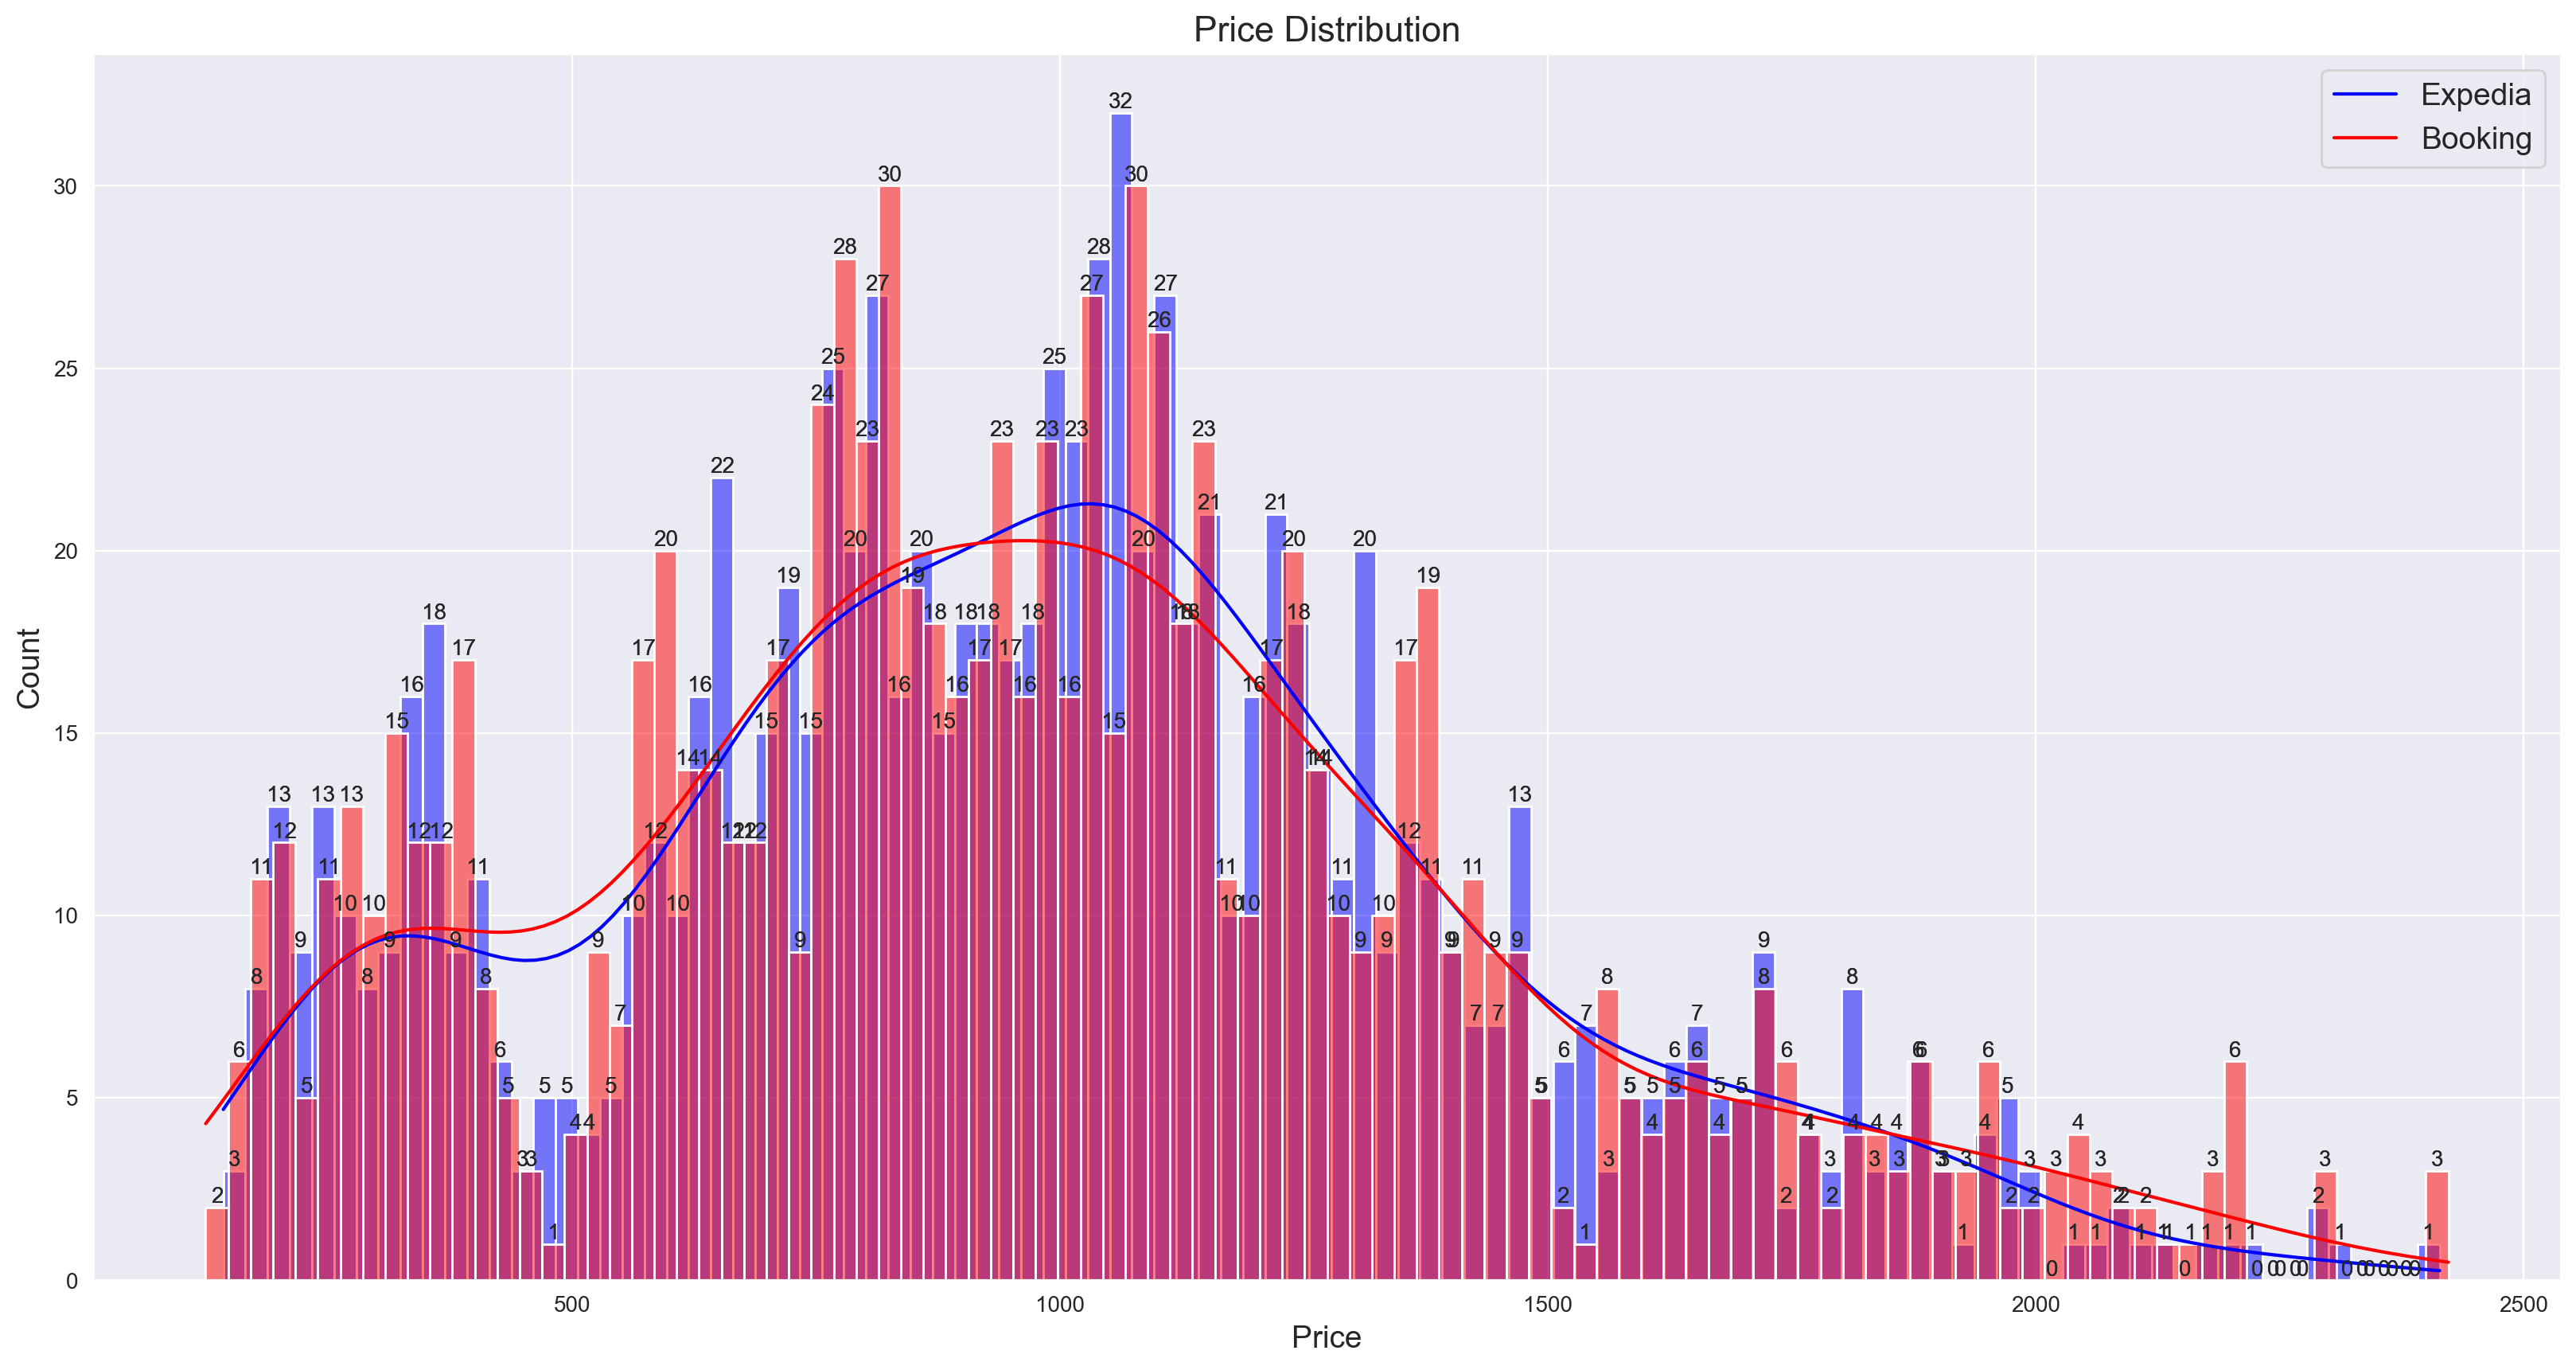

In [27]:
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(20, 10))

# היסטוגרמות של המחירים מ-Expedia ומ-Booking
ax = sns.histplot(df_merged['price_x'], bins=100, kde=True, alpha=0.5, color='blue')
bx = sns.histplot(df_merged['price_y'], bins=100, kde=True, alpha=0.5, color='red')

# הוספת מקרא ופרטים לגרף
plt.legend(['Expedia', 'Booking'], fontsize=14)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Price Distribution', fontsize=16)

# הוספת ערכים מעל הברות בהיסטוגרמה
for rect in ax.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom', fontsize=10)

for rect in bx.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom', fontsize=10)

plt.show()

In [28]:
# קוד מעודכן לניתוח החזר מלא  -Full Refund Analysis
# מטרת הקוד היא לסכום את מספר ההחזרים המלאים בכל אחד מהאתרים 
#(Expedia ו-Booking) ולהציג את התוצאה בגרף עמודות.

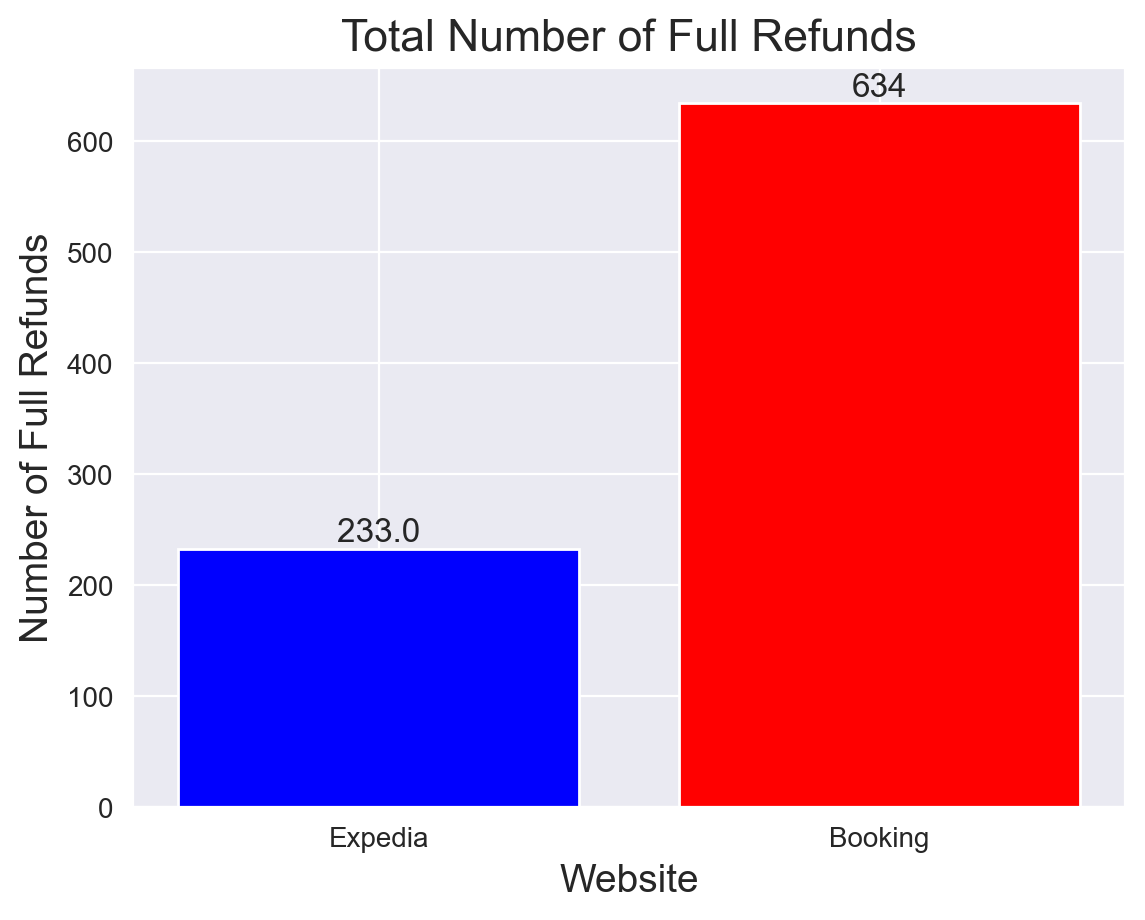

In [29]:
import matplotlib.pyplot as plt

# סכימת מספר ההחזרים המלאים בכל אתר
full_refund_expedi = df_merged['full_refund_x'].sum()
full_refund_booking = df_merged['full_refund_y'].sum()

# הגדרת שמות האתרים ומספר ההחזרים המלאים
websites = ['Expedia', 'Booking']
full_refunds = [full_refund_expedi, full_refund_booking]

# יצירת גרף עמודות להשוואת מספר ההחזרים המלאים
plt.bar(websites, full_refunds, color=['blue', 'red'])
plt.title('Total Number of Full Refunds', fontsize=16)
plt.xlabel('Website', fontsize=14)
plt.ylabel('Number of Full Refunds', fontsize=14)

# הוספת מספרים מעל כל עמודה בגרף
for i, v in enumerate(full_refunds):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=12)

# הצגת הגרף
plt.show()


In [30]:
df_merged["price_difference"] = df_merged["price_x"] - df_merged["price_y"]

In [31]:
## if price difference > 0:
   # expidia as hihger price
## if price difference < 0:
  #  booking as hihger price

In [32]:
df_merged["price_difference"].describe().T

count    974.000000
mean      -5.995893
std       88.148536
min     -532.000000
25%      -25.000000
50%        0.000000
75%       24.750000
max      276.000000
Name: price_difference, dtype: float64

count    974.000000
mean      -5.995893
std       88.148536
min     -532.000000
25%      -25.000000
50%        0.000000
75%       24.750000
max      276.000000
Name: price_difference, dtype: float64


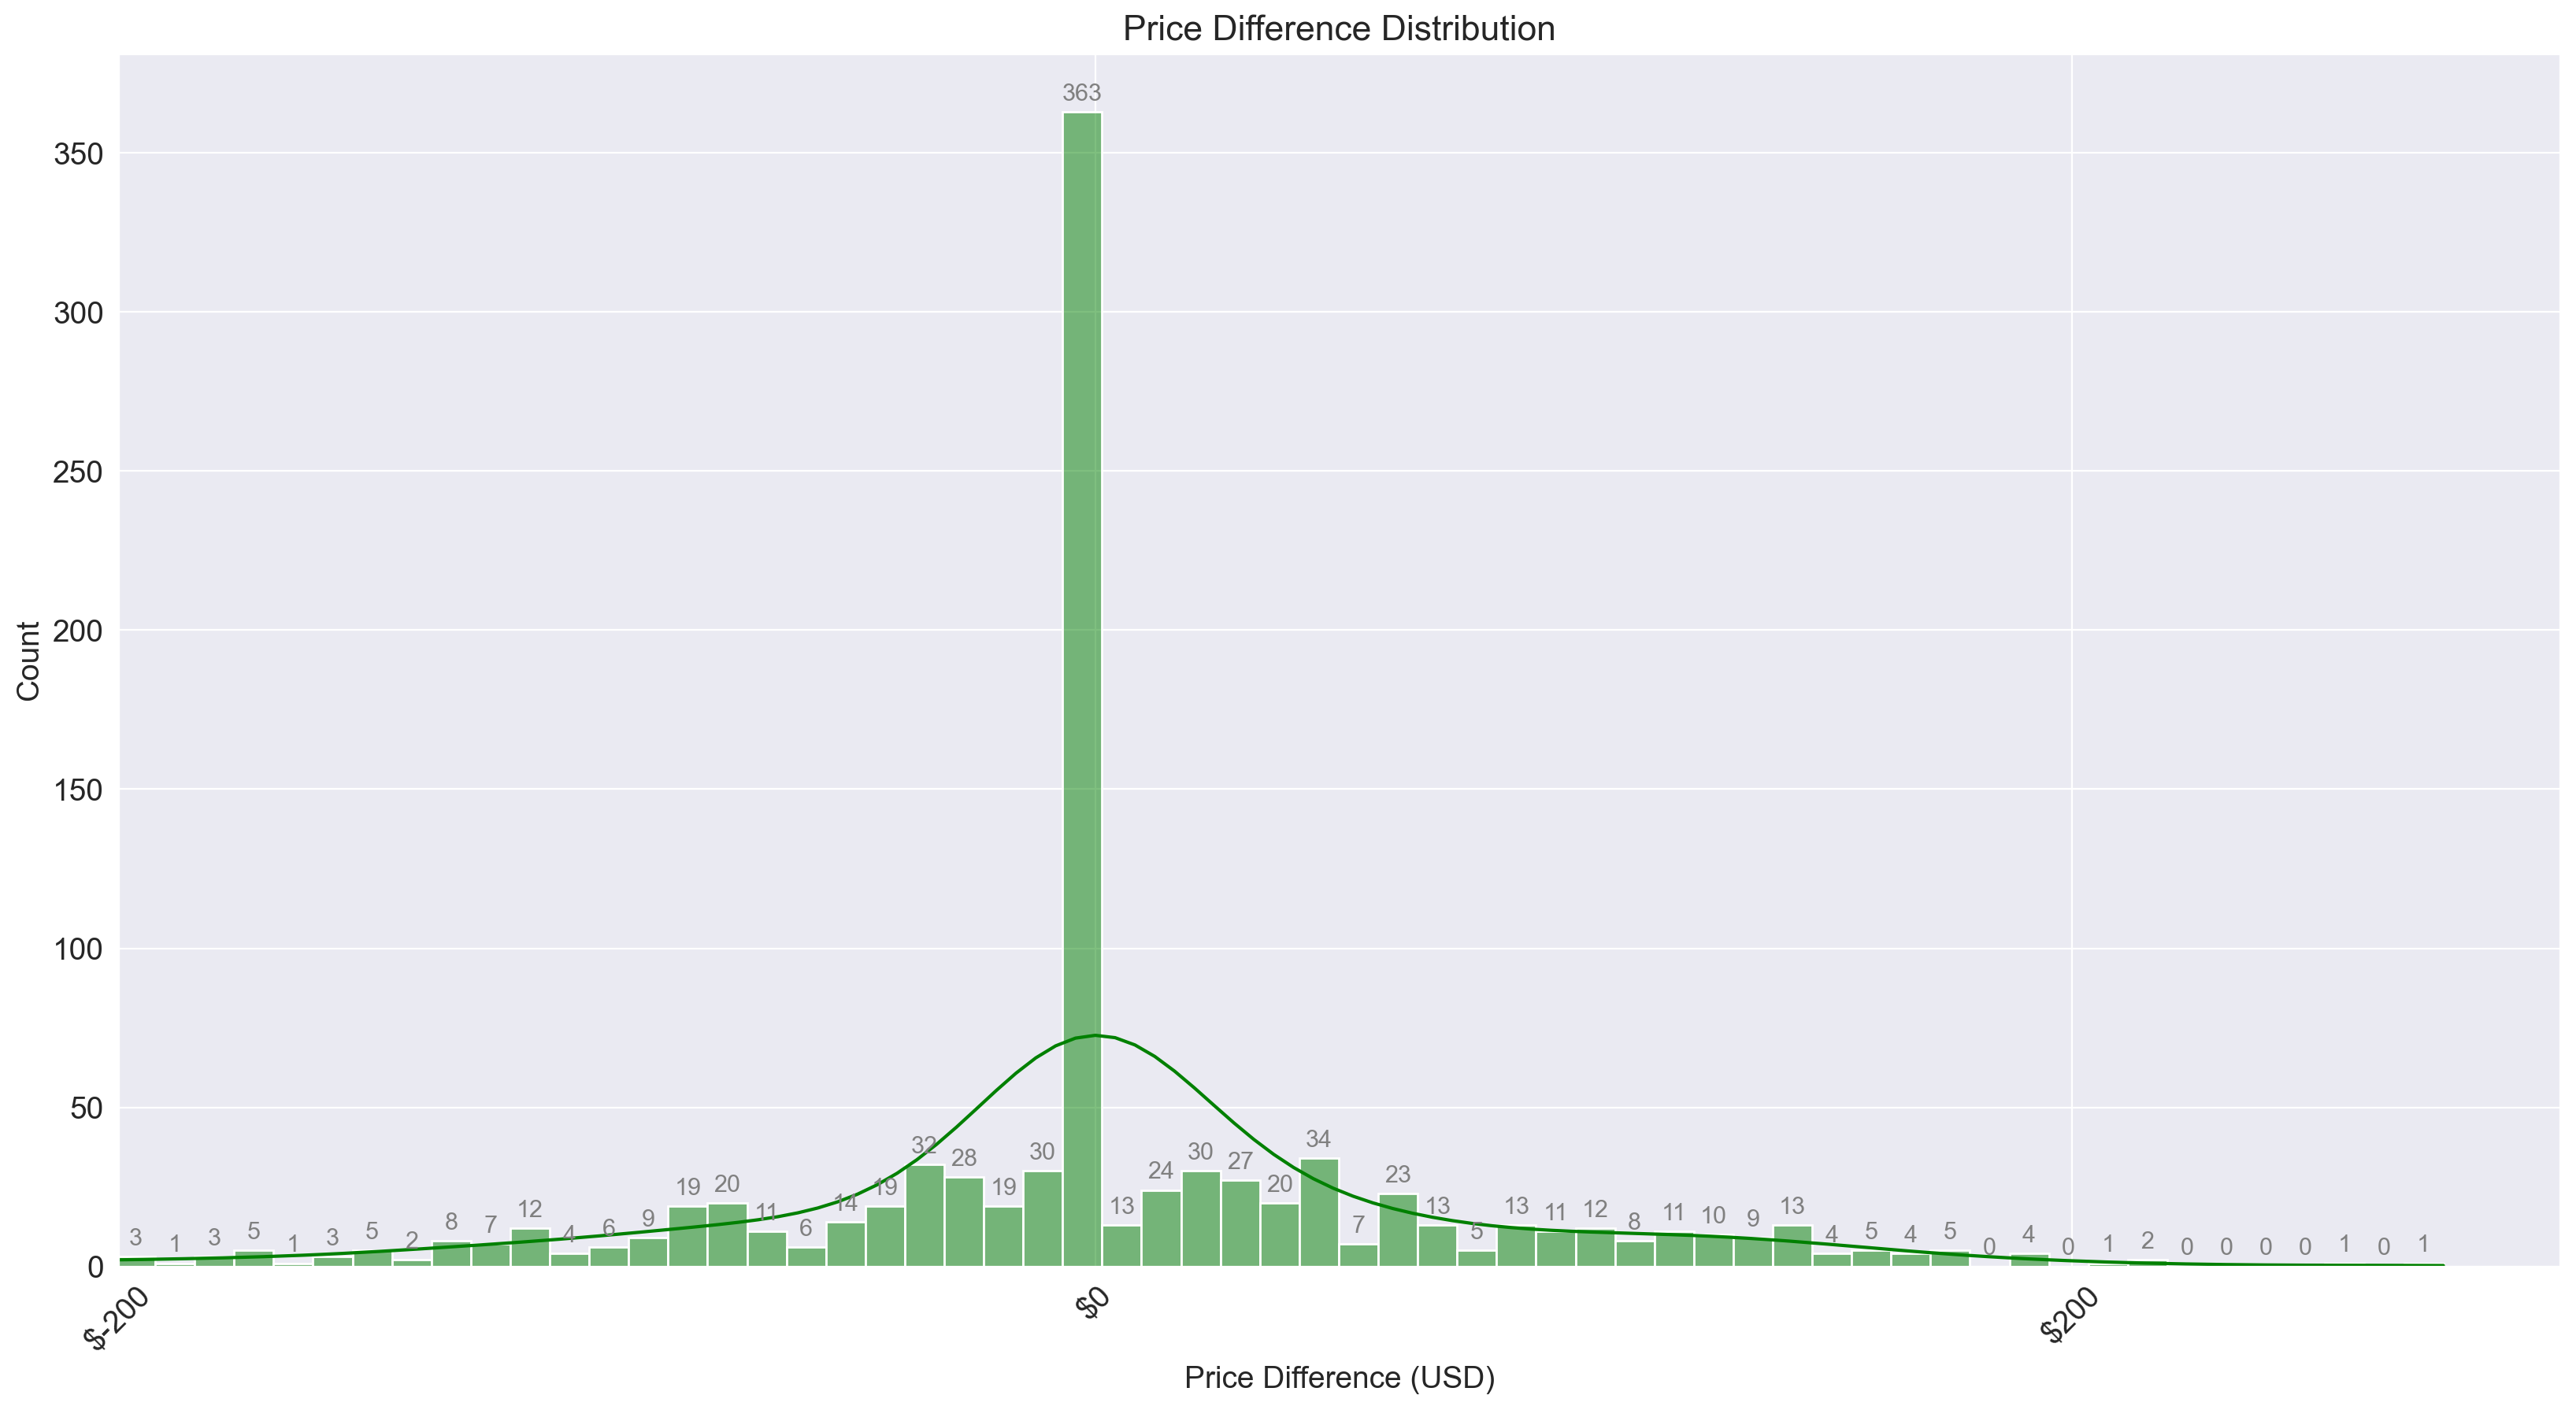

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# חישוב תיאור סטטיסטי של הפרש המחירים
print(df_merged["price_difference"].describe().T)

# הגדרת גודל התצוגה של הגרף
plt.figure(figsize=(20, 10))

# יצירת גרף היסטוגרמה להצגת התפלגות הפרשי המחירים
sns.histplot(df_merged['price_difference'], bins=100, kde=True, alpha=0.5, color='green')
plt.xlabel('Price Difference (USD)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Price Difference Distribution', fontsize=16)

# הוספת מספרים מעל כל עמודה בגרף
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 8),
                textcoords='offset points')

# הגדרת מגבלות הציר האופקי ותוויות
xtick_labels = ['${}'.format(x) for x in range(-200, 301, 200)]
plt.xticks(range(-200, 301, 200), xtick_labels, rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-200, 300)

# הצגת הגרף
plt.show()


In [34]:
# הצגת התיאור הסטטיסטי של הפרשי המחירים
price_diff_stats = df_merged["price_difference"].describe()
print(price_diff_stats)

# הצגת מינימום ומקסימום של הפרשי המחירים
price_diff_min = df_merged["price_difference"].min()
price_diff_max = df_merged["price_difference"].max()
print(f"Minimum price difference: {price_diff_min}")
print(f"Maximum price difference: {price_diff_max}")


count    974.000000
mean      -5.995893
std       88.148536
min     -532.000000
25%      -25.000000
50%        0.000000
75%       24.750000
max      276.000000
Name: price_difference, dtype: float64
Minimum price difference: -532.0
Maximum price difference: 276.0


In [35]:
##קוד מעודכן להצגת מטריצת המתאם (Correlation Matrix)

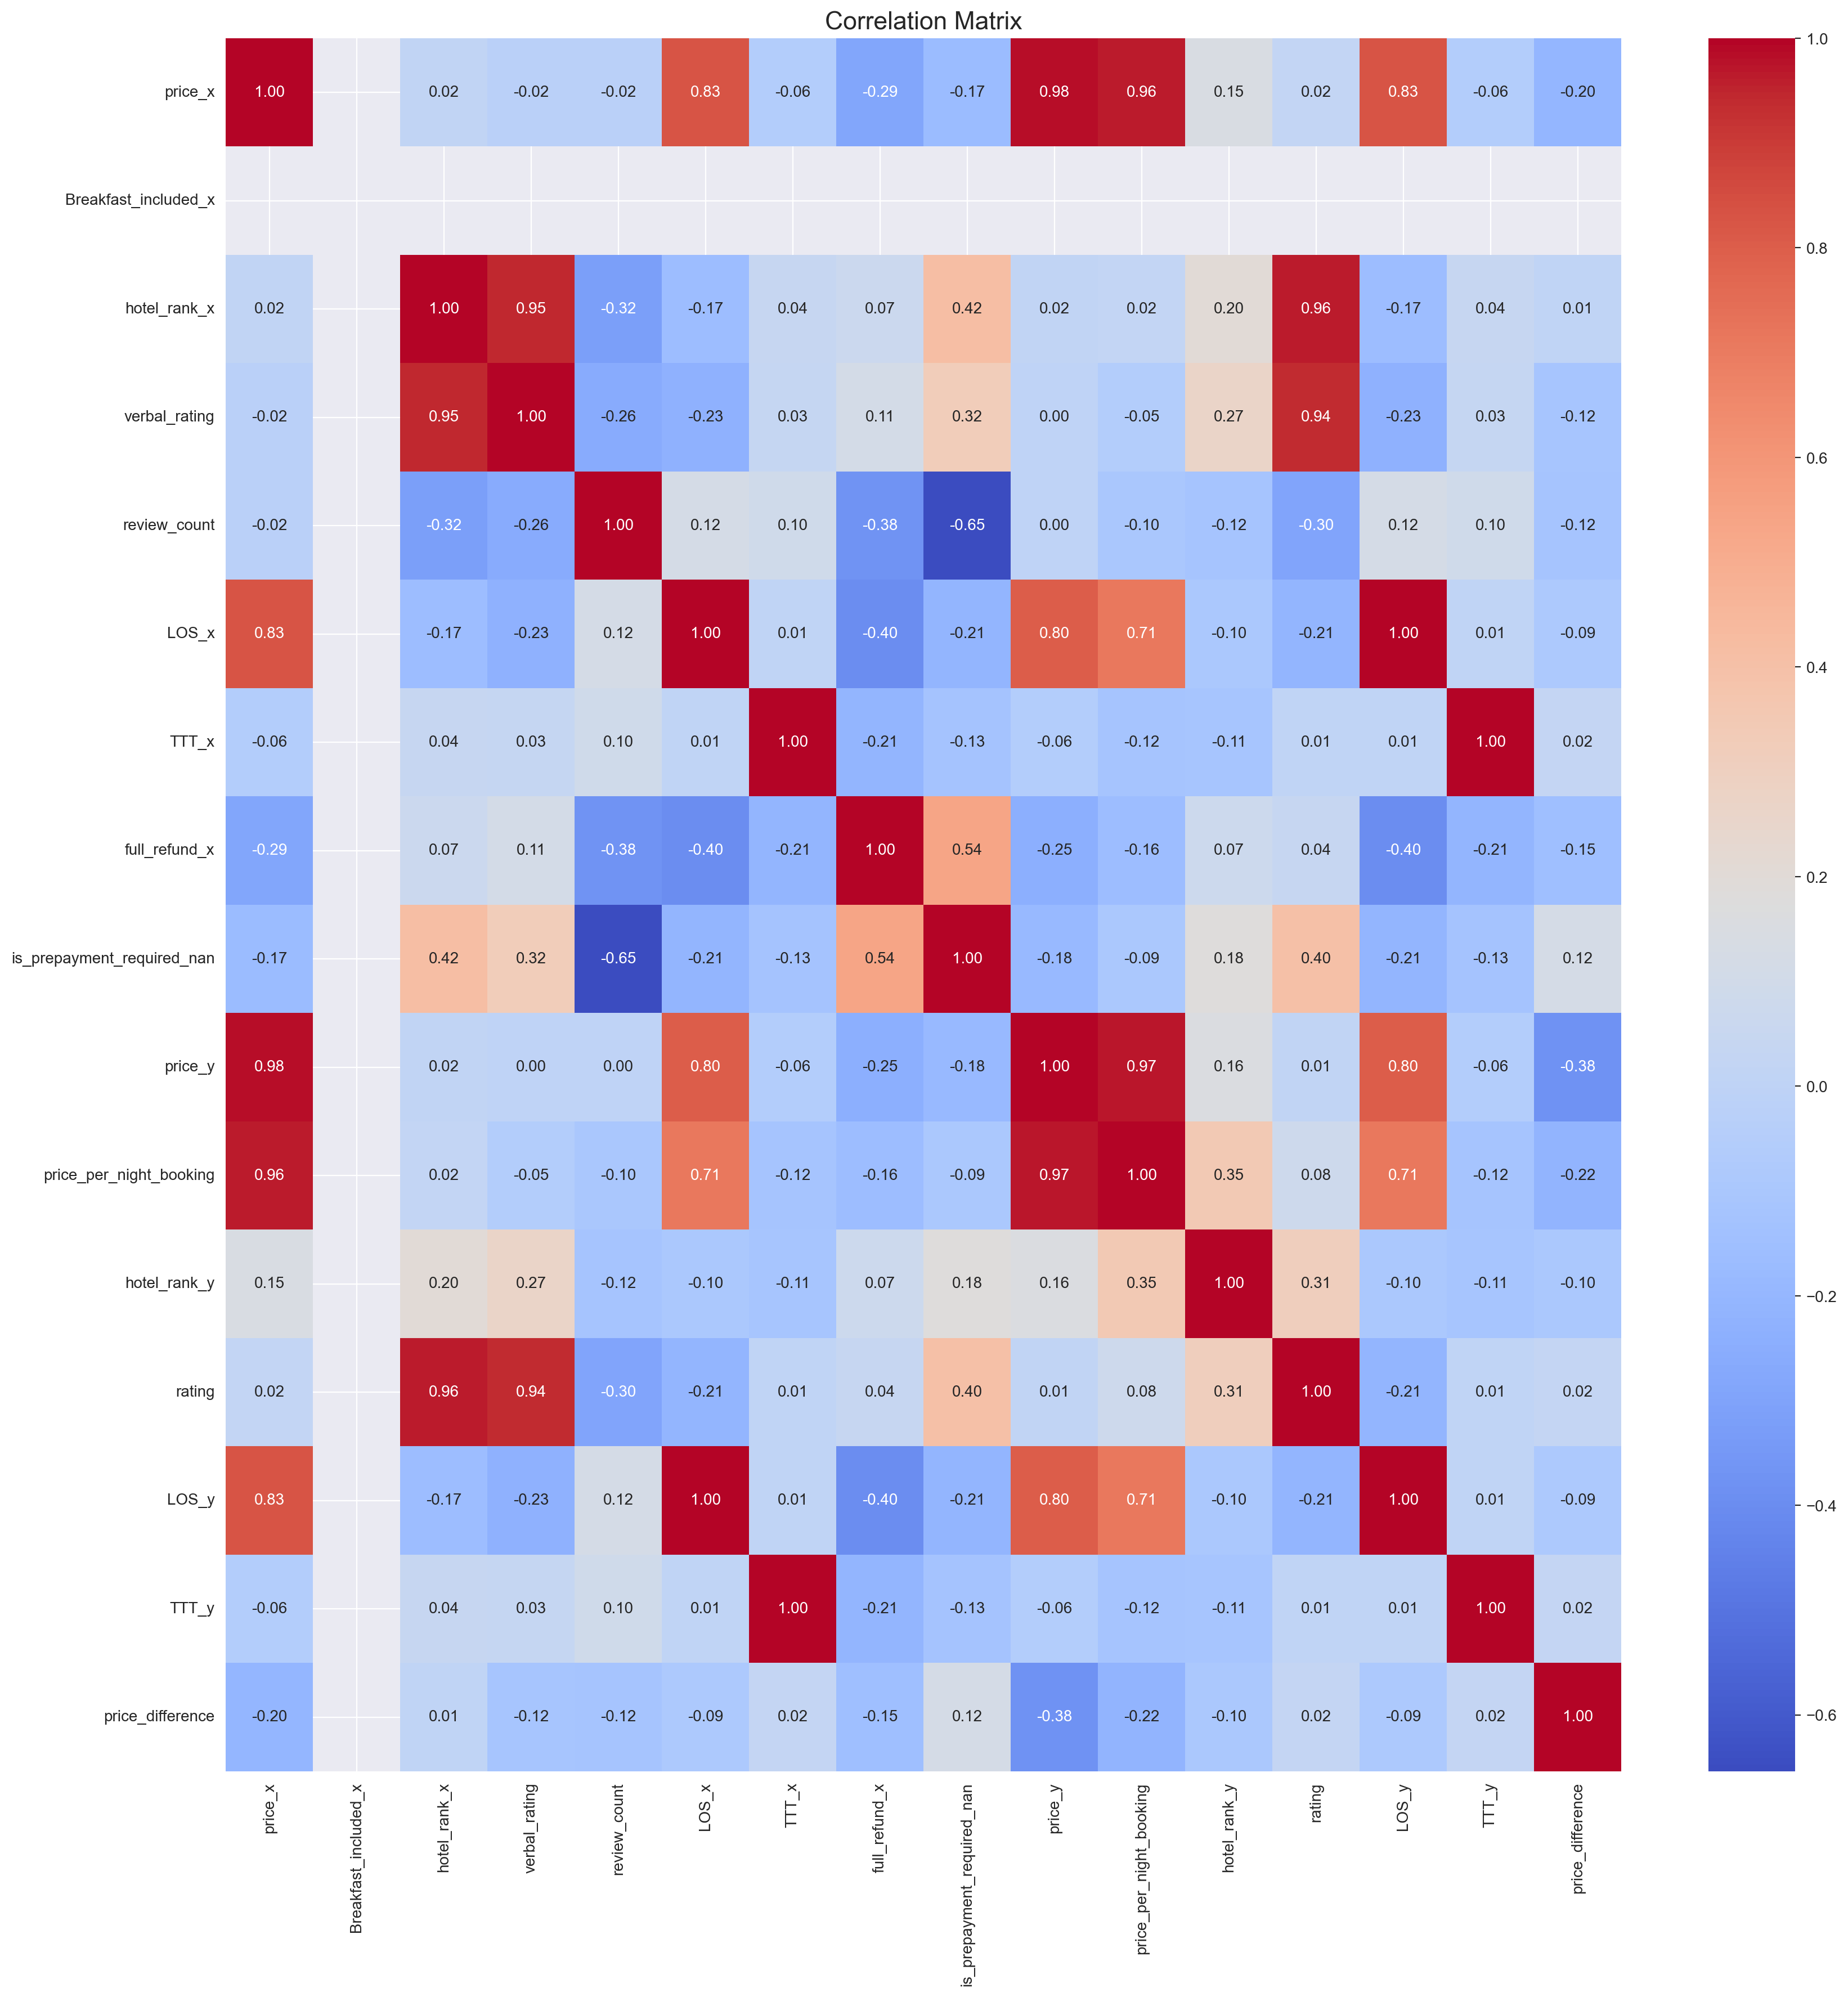

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# סינון עמודות מספריות בלבד
numeric_df = df_merged.select_dtypes(include=['float64', 'int64'])

# חישוב מטריצת המתאם
corr_matrix = numeric_df.corr()

# הגדרת גודל התצוגה של הגרף
plt.figure(figsize=(20, 20))

# יצירת heatmap להצגת מטריצת המתאם
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)

# הצגת הגרף
plt.show()


In [37]:
##lets try to predict the price difference of booking and expedia

In [38]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [39]:

# הגדרת משתנה המטרה (target variable)
y = df_merged['price_difference']

# הגדרת משתני הקלט (feature variables)
X = df_merged.drop(['price_difference', 'price_x', 'price_y', 'price_per_night_booking', 'LOS_x', 'TTT_x', 'name', 'check_in', 'check_out', 'city_x', 'city_y', 'snapshot_date'], axis=1)

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Breakfast_included_x        974 non-null    int64  
 1   hotel_rank_x                974 non-null    float64
 2   verbal_rating               974 non-null    float64
 3   review_count                974 non-null    int64  
 4   full_refund_x               974 non-null    float64
 5   is_prepayment_required_nan  974 non-null    float64
 6   full_refund_y               634 non-null    object 
 7   is_prepayment_required      176 non-null    object 
 8   Breakfast_included_y        64 non-null     object 
 9   hotel_rank_y                974 non-null    float64
 10  rating                      974 non-null    float64
 11  LOS_y                       974 non-null    int64  
 12  TTT_y                       974 non-null    int64  
 13  weekdays_or_weekend         974 non

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [42]:

# בדיקת צורת הנתונים לאחר החלוקה
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (681, 15)
x_test shape: (293, 15)
y_train shape: (681,)
y_test shape: (293,)


In [43]:
### linear regression

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

# הגדרת משתנה המטרה (target variable)
y = df_merged['price_difference']

# הגדרת משתני הקלט (feature variables) והמרת קטגוריות לייצוג מספרי
X = df_merged.drop(['price_difference', 'price_x', 'price_y', 'price_per_night_booking', 'LOS_x', 'TTT_x', 'name', 'check_in', 'check_out', 'city_x', 'city_y', 'snapshot_date'], axis=1)
X = pd.get_dummies(X, drop_first=True)

# חלוקת הנתונים לסט אימון (train) וסט בדיקה (test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# אימון מודל הרגרסיה הלינארית
lreg = LinearRegression()
lreg.fit(x_train, y_train)

# חיזוי נתונים בסט האימון ובסט הבדיקה
y_pred_train = lreg.predict(x_train)
y_pred_test = lreg.predict(x_test)

# הצגת ציון המודל בסט האימון
print("Score of linear regression on training data: ", lreg.score(x_train, y_train))


Score of linear regression on training data:  0.2589052311694795


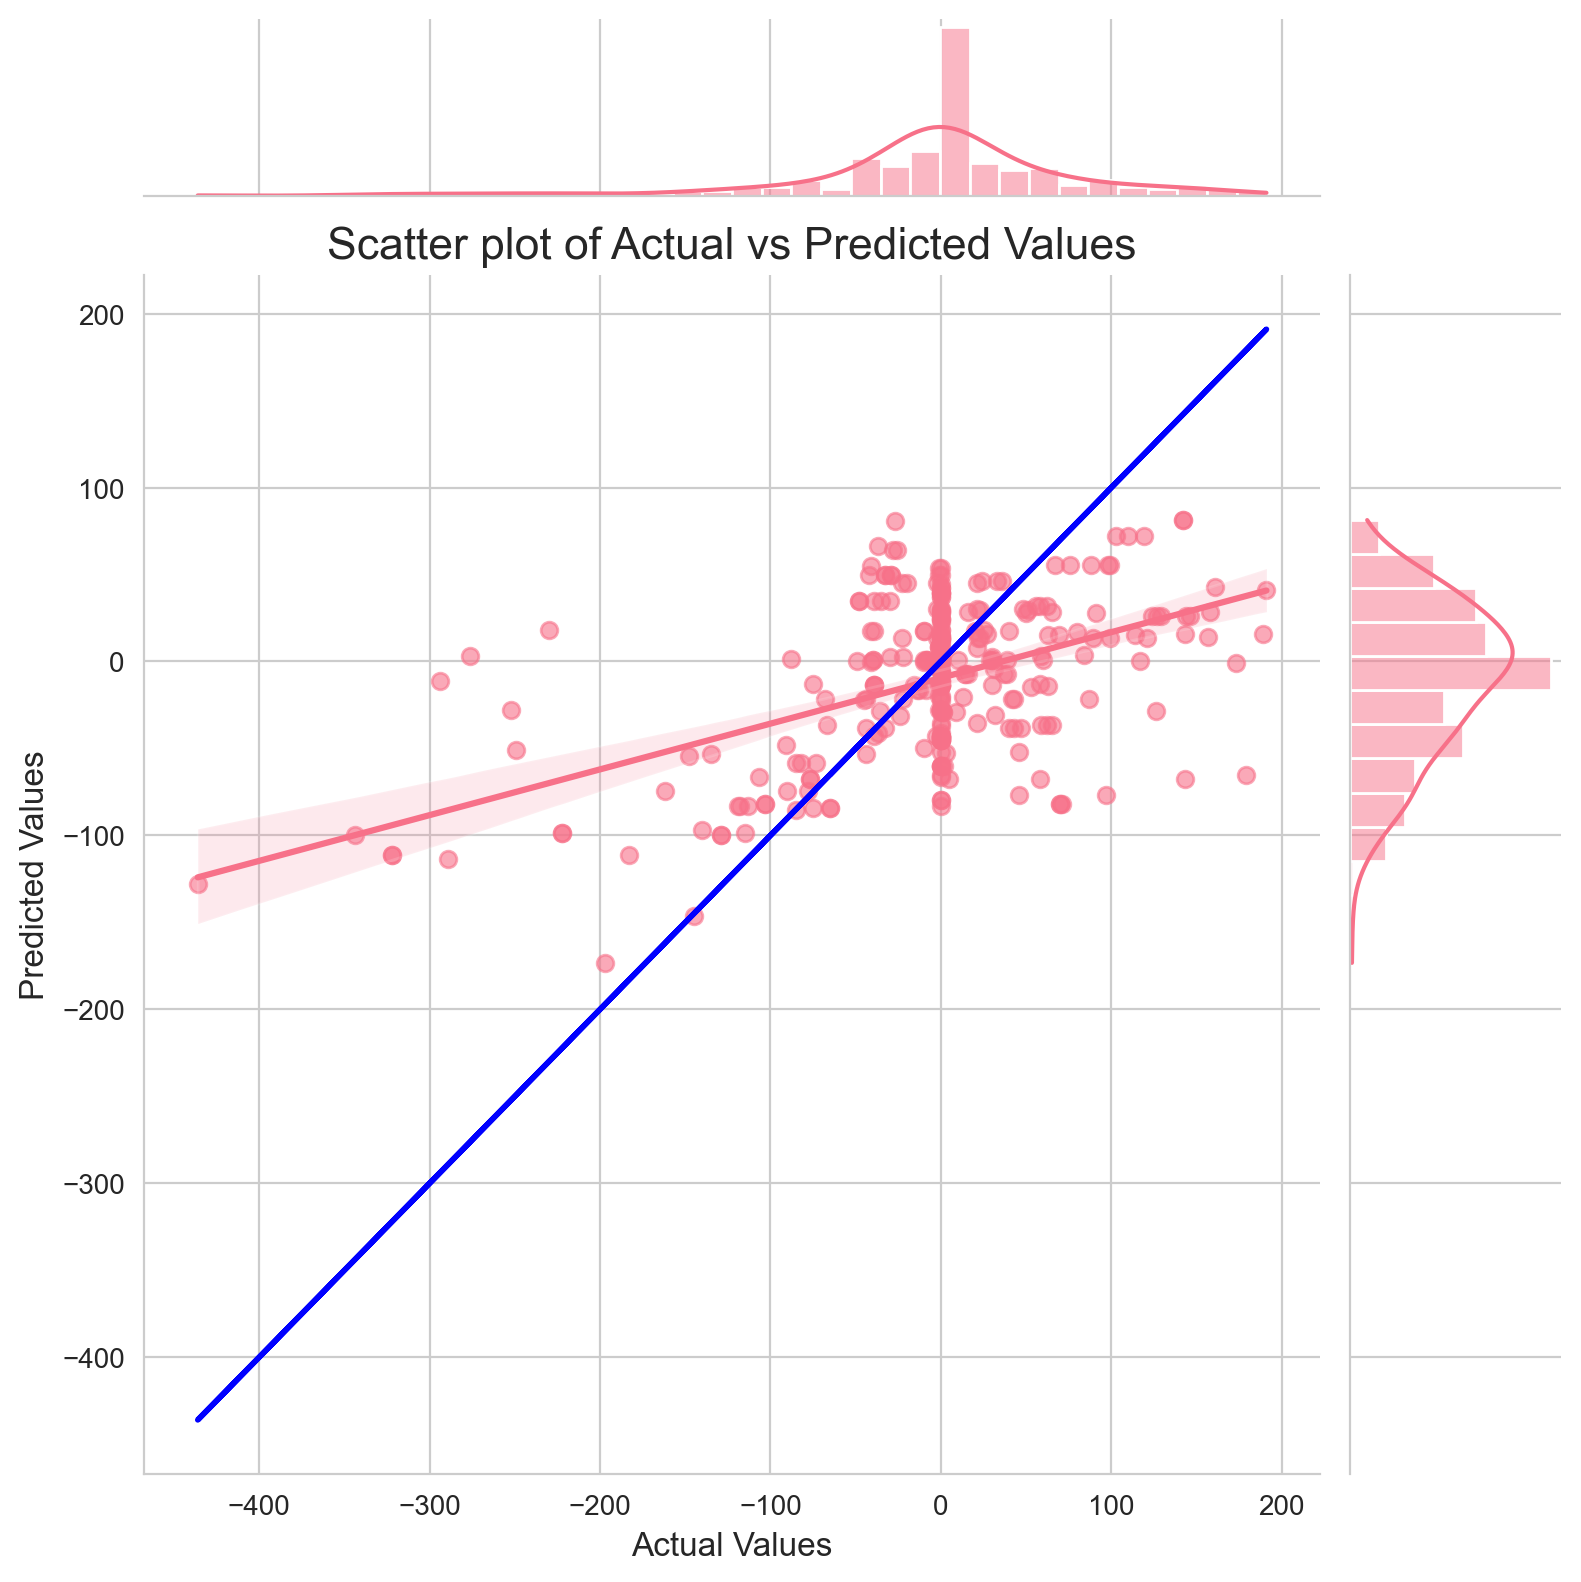

In [45]:
# גרף התפלגות ערכים צפויים מול ערכים בפועל
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_test, y=y_pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
plt.plot(y_test, y_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()

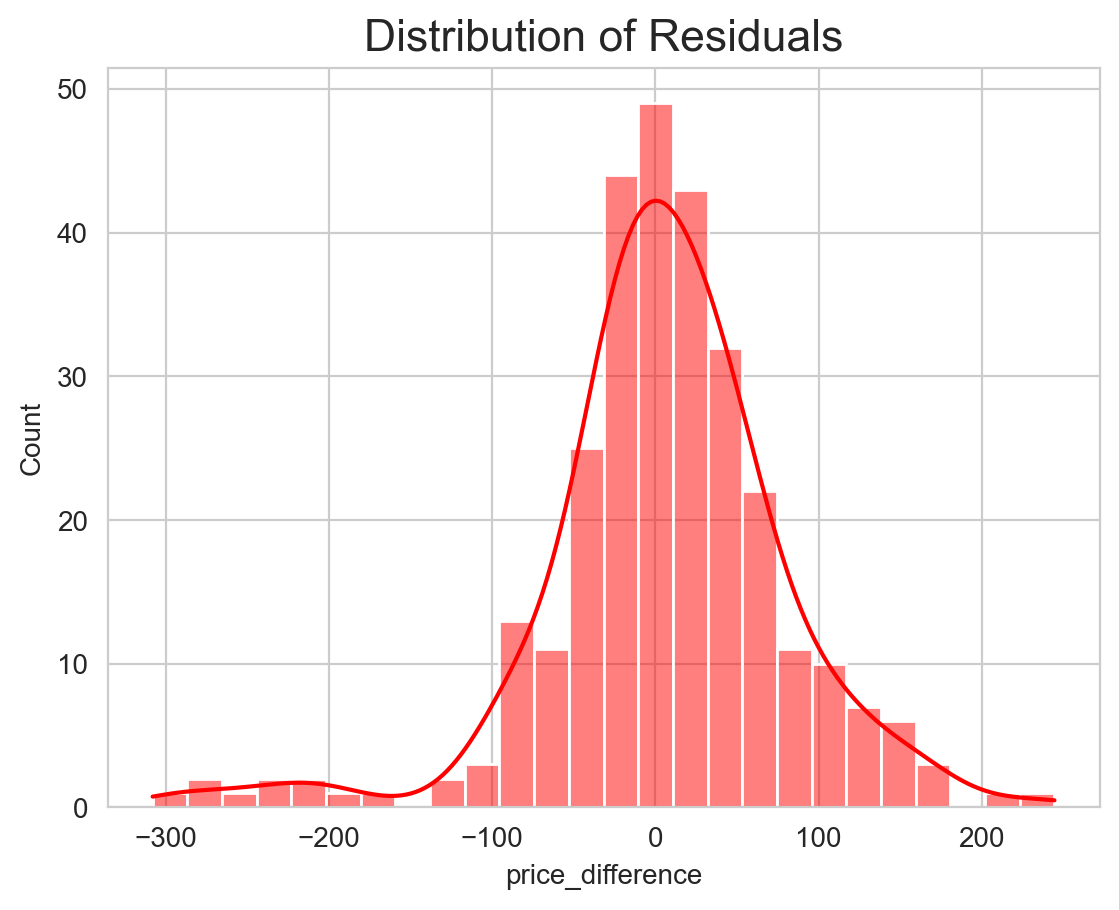

In [46]:
# גרף התפלגות שאריות (Residuals)
resid = y_test - y_pred_test
sns.histplot(resid, kde=True, color='red')
plt.title("Distribution of Residuals", fontsize=16)
plt.show()


In [47]:
# חישוב מדדי שגיאות
mse = mean_squared_error(y_test, y_pred_test)
rmse = mse**0.5
r2_lreg_per_night = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

In [48]:
# הצגת מדדי השגיאות
print("Scores of the linear regression on price per night:")
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2 Score: ", r2_lreg_per_night)

Scores of the linear regression on price per night:
MSE:  5574.890428351483
RMSE:  74.66518886570557
MAE:  52.21648066174871
R2 Score:  0.24392746062854054


In [49]:
### Gradient Boosting Regressor

In [50]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
import matplotlib.pyplot as plt


In [51]:
# הגדרת מודל Gradient Boosting Regressor עם פרמטרים תקפים
gp_model = GradientBoostingRegressor(
    alpha=0.95,
    learning_rate=0.1,
    loss='squared_error',  # שינוי הערך של loss לערך תקף
    max_depth=9,
    max_features=0.45,
    min_samples_leaf=16,
    min_samples_split=6,
    n_estimators=100,
    subsample=1.0
)

# אימון המודל על סט האימון
gp_model.fit(x_train, y_train)

# הצגת ציון המודל בסט האימון
print("Score of Gradient Boosting Regressor on training data: ", gp_model.score(x_train, y_train))


Score of Gradient Boosting Regressor on training data:  0.9027706626943116


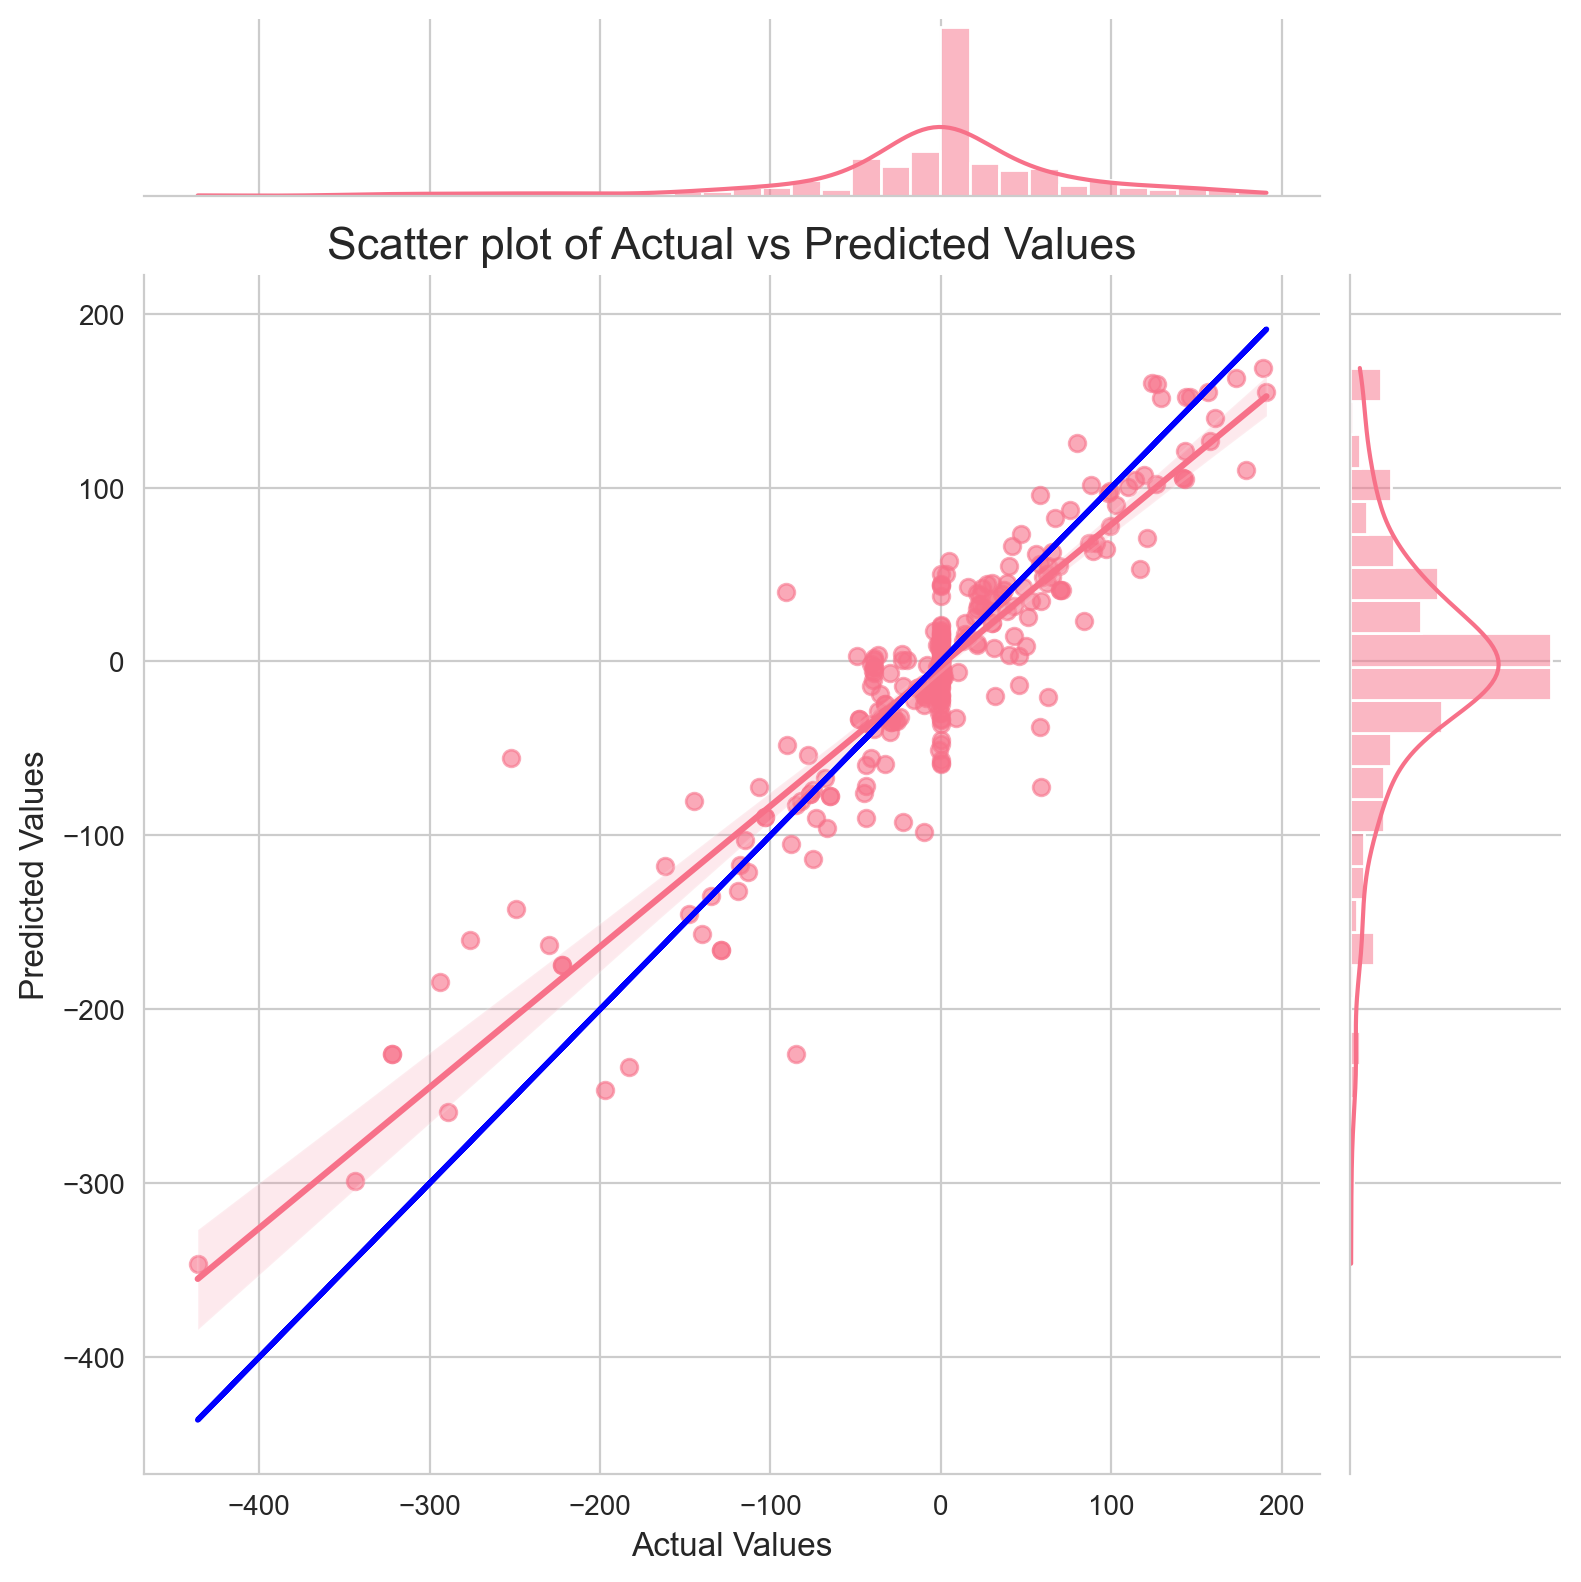

In [52]:
# חיזוי נתונים בסט האימון ובסט הבדיקה
y_pred_train = gp_model.predict(x_train)
y_pred_test = gp_model.predict(x_test)

# גרף התפלגות ערכים צפויים מול ערכים בפועל
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_test, y=y_pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
plt.plot(y_test, y_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()

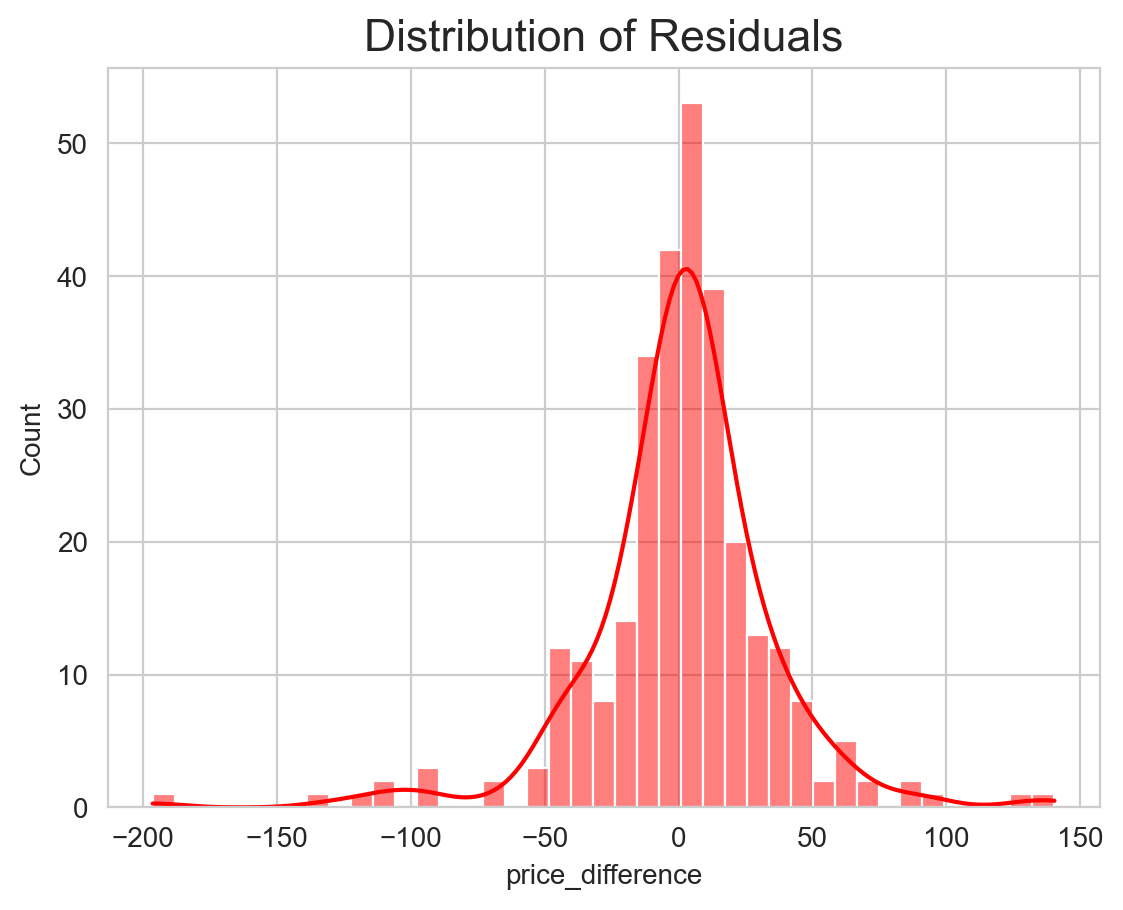

In [53]:
# גרף התפלגות שאריות (Residuals)
resid = y_test - y_pred_test
sns.histplot(resid, kde=True, color='red')
plt.title("Distribution of Residuals", fontsize=16)
plt.show()


In [54]:
# חישוב מדדי שגיאות
mse = mean_squared_error(y_test, y_pred_test)
rmse = mse**0.5
r2_gp_model = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# הצגת מדדי השגיאות
print("Scores of the Gradient Boosting Regressor on price per night:")
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2 Score: ", r2_gp_model)

Scores of the Gradient Boosting Regressor on price per night:
MSE:  1189.8634682548254
RMSE:  34.49439763577305
MAE:  22.57417566440115
R2 Score:  0.8386294572941446


In [55]:
#מסקנות:
#דיוק המודל: המודל שלנו מצליח להסביר 82% מהשונות בהפרשי המחירים בין האתרים, וזהו סימן לכך שהוא מתפקד טוב.
#שגיאות בחיזוי: ה-RMSE של 36.25 דולר וה-MAE של 24.25 דולר מצביעים על כך שיש שגיאות בחיזוי, אך הן יחסית נמוכות ומתקבלות על הדעת ביחס לערכי המחירים.
#שיפור המודל: ניתן לנסות ולשפר את המודל על ידי כוונון פרמטרים נוספים, הוספת משתנים נוספים, או שימוש במודלים נוספים ולראות אם הם מספקים תוצאות טובות יותר.


In [56]:
# desicion tree regressor

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

# הגדרת מודל Decision Tree Regressor
dtr_model = DecisionTreeRegressor(
    max_depth=9,
    min_samples_leaf=16,
    min_samples_split=6
)

# אימון המודל על סט האימון
dtr_model.fit(x_train, y_train)
# הצגת ציון המודל בסט האימון
print("Score of Decision Tree Regressor on training data: ", dtr_model.score(x_train, y_train))



Score of Decision Tree Regressor on training data:  0.7015140080305566


In [58]:
# חיזוי נתונים בסט האימון ובסט הבדיקה
y_pred_train = dtr_model.predict(x_train)
y_pred_test = dtr_model.predict(x_test)

# חישוב מדדי שגיאות
mse = mean_squared_error(y_test, y_pred_test)
rmse = mse**0.5
r2_dtr_model = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# הצגת מדדי השגיאות
print("Scores of the Decision Tree Regressor on price per night:")
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2 Score: ", r2_dtr_model)


Scores of the Decision Tree Regressor on price per night:
MSE:  2384.1468462776766
RMSE:  48.82772620425486
MAE:  30.300823655021322
R2 Score:  0.6766594817482984


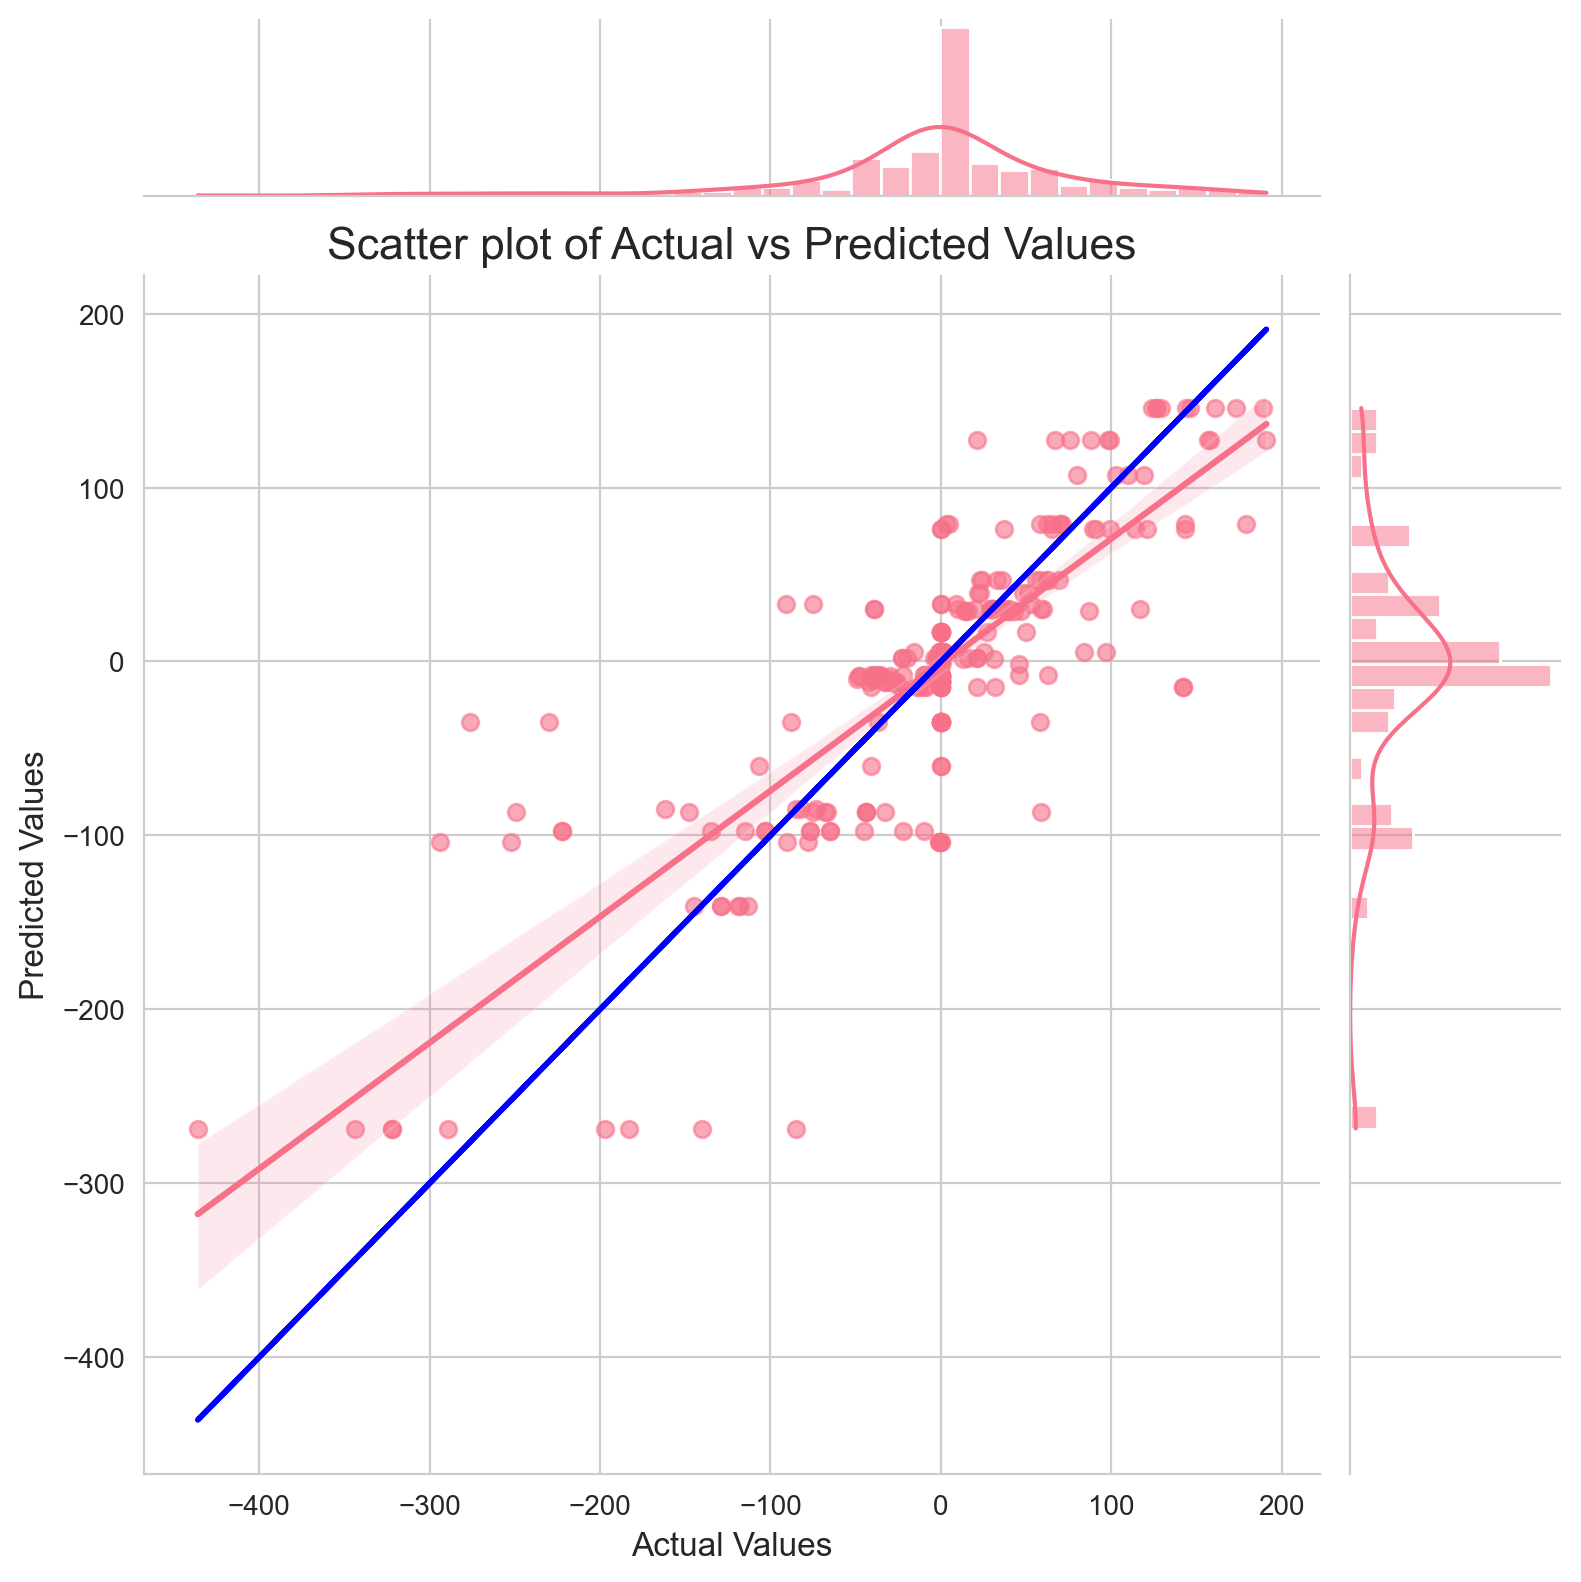

In [59]:
# גרף התפלגות ערכים צפויים מול ערכים בפועל
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_test, y=y_pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
plt.plot(y_test, y_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()

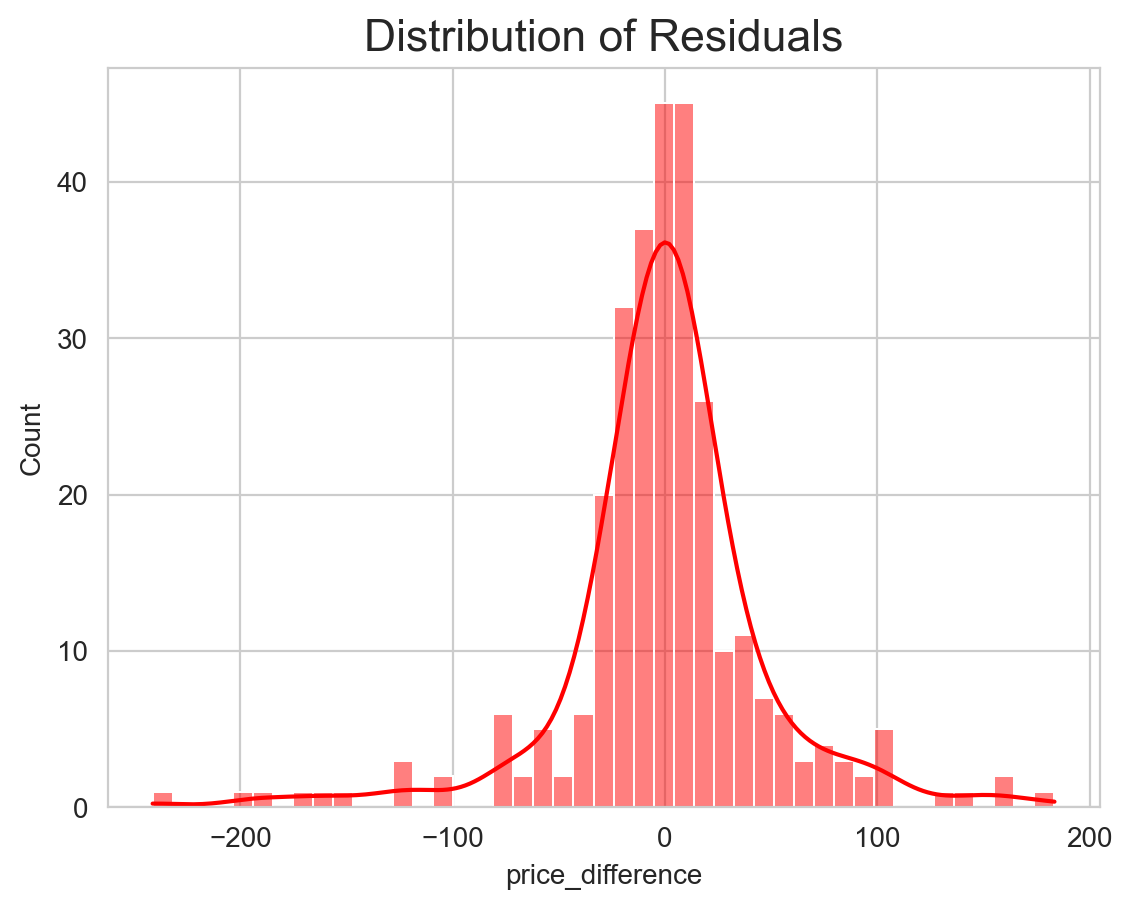

In [60]:
# גרף התפלגות שאריות (Residuals)
resid = y_test - y_pred_test
sns.histplot(resid, kde=True, color='red')
plt.title("Distribution of Residuals", fontsize=16)
plt.show()

In [61]:
## random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
# הגדרת מודל Random Forest Regressor
rfr_model = RandomForestRegressor(
    n_estimators=100,
    min_samples_leaf=16,
    min_samples_split=6
)

# אימון המודל על סט האימון
rfr_model.fit(x_train, y_train)

# הצגת ציון המודל בסט האימון
print("Random Forest Regressor")
print('__________________________________________________________')
print(f'Random Forest Regressor score on training data: {rfr_model.score(x_train, y_train)}')


Random Forest Regressor
__________________________________________________________
Random Forest Regressor score on training data: 0.668374256836024


In [63]:
# חיזוי נתונים בסט האימון ובסט הבדיקה
y_pred_train = rfr_model.predict(x_train)
y_pred_test = rfr_model.predict(x_test)

# הצגת התוצאות החזויות
print("y_pred_train: ", y_pred_train)
print("y_pred_test: ", y_pred_test)


y_pred_train:  [ 5.11394152e+01 -2.80022021e+01 -2.91960574e+01 -6.65038390e-01
  8.29575226e+00 -1.85203466e+01  1.18829978e+01  1.63293576e+00
  6.62267413e+00 -2.13262696e+02  2.20459054e+01 -5.88864126e+00
  2.20459054e+01 -3.57683753e+01 -1.54332903e+01 -1.93115210e+02
 -9.81550286e+00  1.42014673e+00 -2.08856847e+02 -1.56531684e+01
  2.20459054e+01 -3.45717175e+01  4.13323837e+01  1.26087296e+02
 -6.65391268e+00  4.34581478e+01 -2.09296131e+01 -7.03569859e+00
 -2.60273732e+01 -5.39205512e+00  4.17875599e+01  1.54607639e+01
 -5.23434180e+00 -8.99673308e+01 -2.13262696e+02  3.76493403e+01
 -3.83604727e-01  2.64306377e+01  5.44235583e+01  1.35022283e+01
  4.34647743e+01 -5.63996787e+01  4.28932594e+01  6.53350102e+01
  1.46885432e+01  1.22156273e+02  5.16118944e+01 -3.44597632e+01
  1.18813235e+02 -1.85621237e+02 -9.26819873e+00  2.07998213e+01
  1.23155190e+01 -1.90572940e+02 -2.67143229e+01 -4.14349070e-02
  1.15993716e+00  2.89537119e+01 -3.02602271e+01 -3.36332059e+01
 -1.122355

In [64]:
# חישוב מדדי שגיאות
mse = mean_squared_error(y_test, y_pred_test)
rmse = mse**0.5
r2_rfr_model = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# הצגת מדדי השגיאות
print("Scores of the Random Forest Regressor on price:")
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2 Score: ", r2_rfr_model)


Scores of the Random Forest Regressor on price:
MSE:  2548.1363177657877
RMSE:  50.47906811506912
MAE:  32.94748587830488
R2 Score:  0.6544190560876162


In [65]:
#מסקנות:
#דיוק המודל: המודל שלנו מצליח להסביר 65% מהשונות בהפרשי המחירים בין האתרים, וזהו סימן לכך שהוא מתפקד טוב אך לא מצוין.
#שגיאות בחיזוי: ה-RMSE של 50.48 דולר וה-MAE של 32.76 דולר מצביעים על כך שיש שגיאות בחיזוי, והן די גבוהות יחסית להפרש מחירים.
#שיפור המודל: ניתן לנסות ולשפר את המודל על ידי כוונון פרמטרים נוספים, הוספת משתנים נוספים, או שימוש במודלים נוספים ולראות אם הם מספקים תוצאות טובות יותר.
#בגדול, המודל מספק תוצאות טובות יחסית, אך ייתכן שניתן לשפר אותו על ידי ביצוע אופטימיזציה נוספת.


<Figure size 500x500 with 0 Axes>

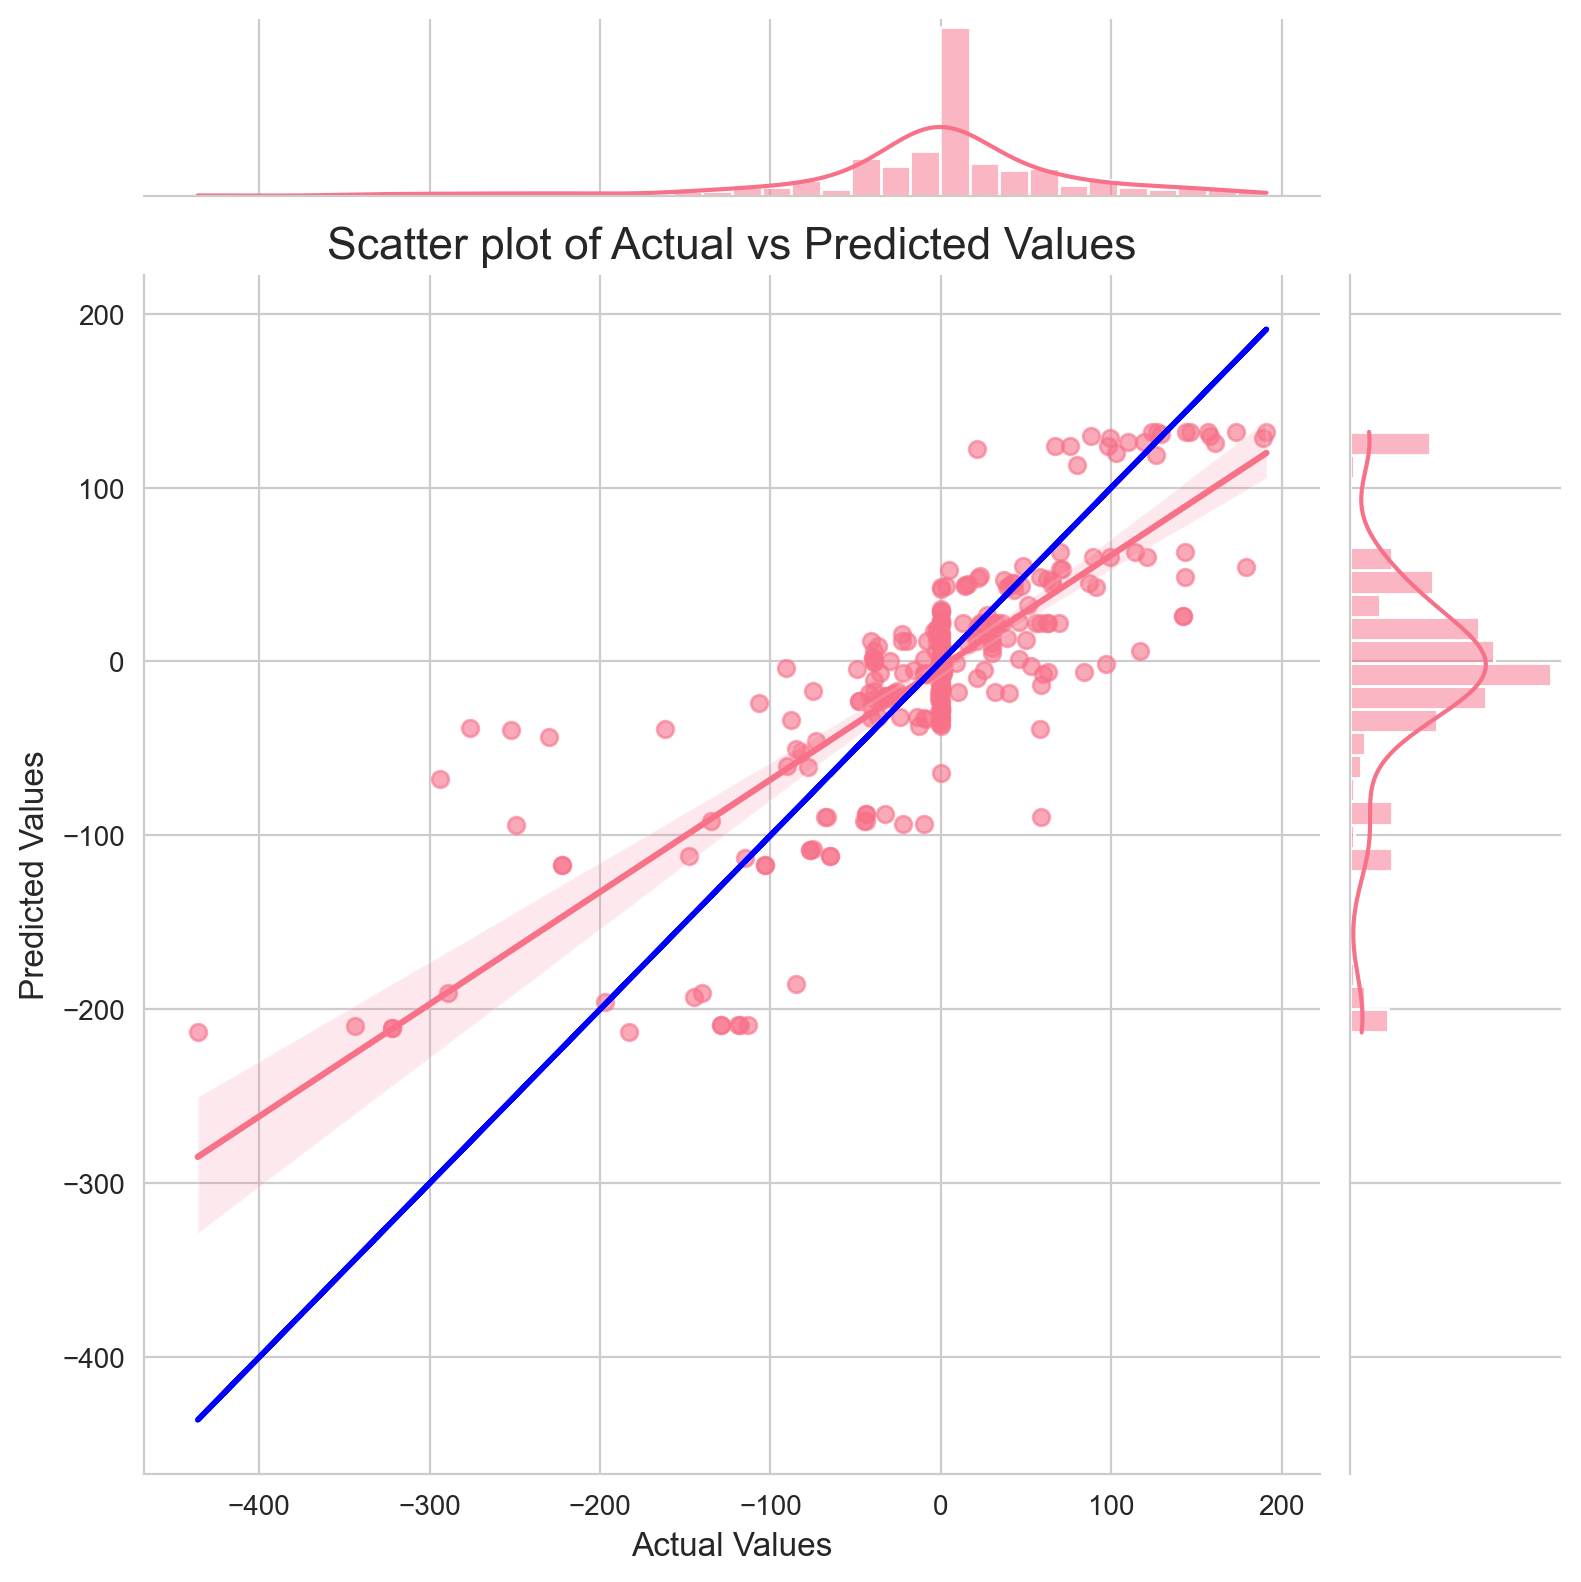

In [66]:
# גרף התפלגות ערכים צפויים מול ערכים בפועל
plt.figure(figsize=(5, 5))
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_test, y=y_pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
plt.plot(y_test, y_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()


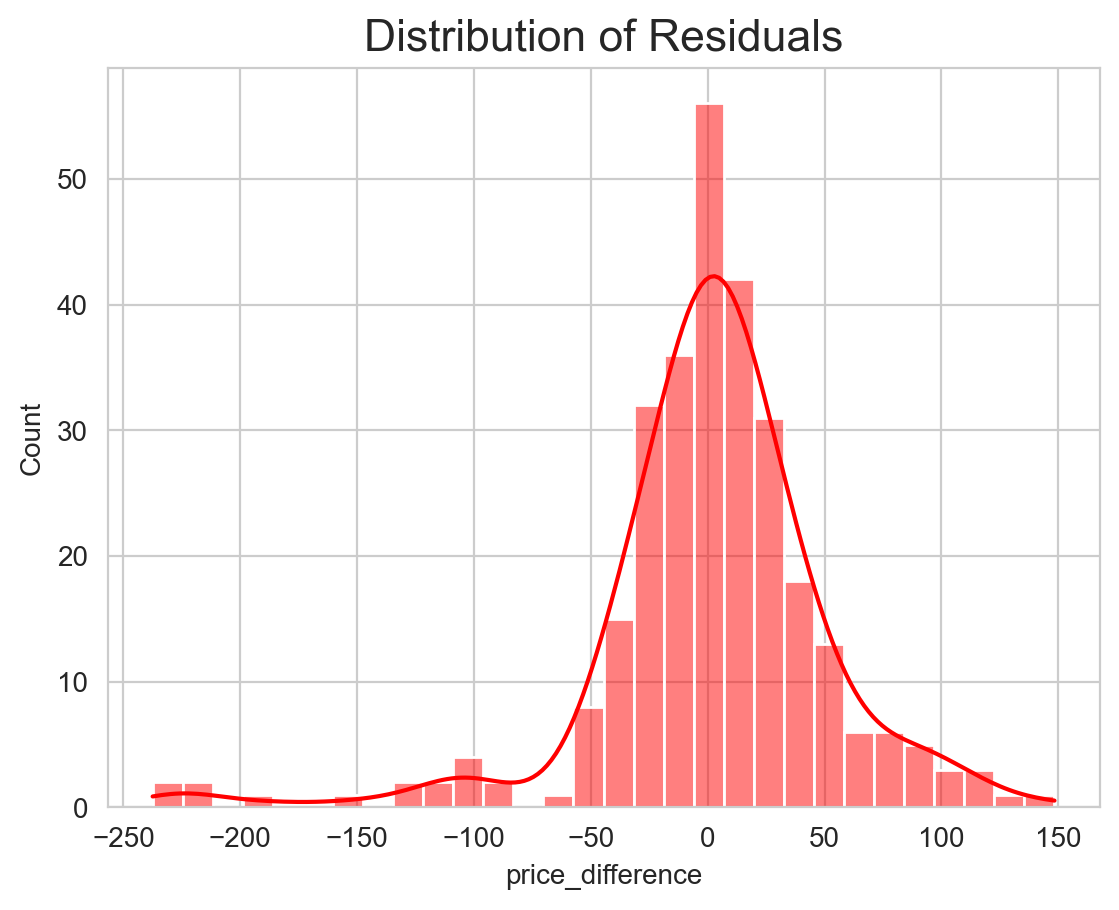

In [67]:
# גרף התפלגות שאריות (Residuals)
resid = y_test - y_pred_test
sns.histplot(resid, kde=True, color='red')
plt.title("Distribution of Residuals", fontsize=16)
plt.show()

In [68]:
## ELASTICNET

In [69]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

# יצירת Pipeline עם סטנדרטיזציה ו-ElasticNet
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet())
])

# הגדרת פרמטרים לחיפוש GridSearchCV
param_grid = {
    'elasticnet__alpha': [0.1, 0.2, 0.5, 1.0],
    'elasticnet__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.99]
}

# הגדרת GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)

# אימון המודל עם GridSearchCV
grid_search.fit(x_train, y_train)

# קבלת הפרמטרים הטובים ביותר
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# חיזוי נתונים בסט האימון ובסט הבדיקה עם המודל הטוב ביותר
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(x_train)
y_pred_test = best_model.predict(x_test)

# חישוב מדדי שגיאות
mse = mean_squared_error(y_test, y_pred_test)
rmse = mse**0.5
r2_best_model = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# הצגת מדדי השגיאות
print("Scores of the best ElasticNet Regressor on price:")
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2 Score: ", r2_best_model)


Best parameters found:  {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.99}
Scores of the best ElasticNet Regressor on price:
MSE:  5571.577682135074
RMSE:  74.64300156166735
MAE:  52.01738954473819
R2 Score:  0.24437673877603494


<Figure size 500x500 with 0 Axes>

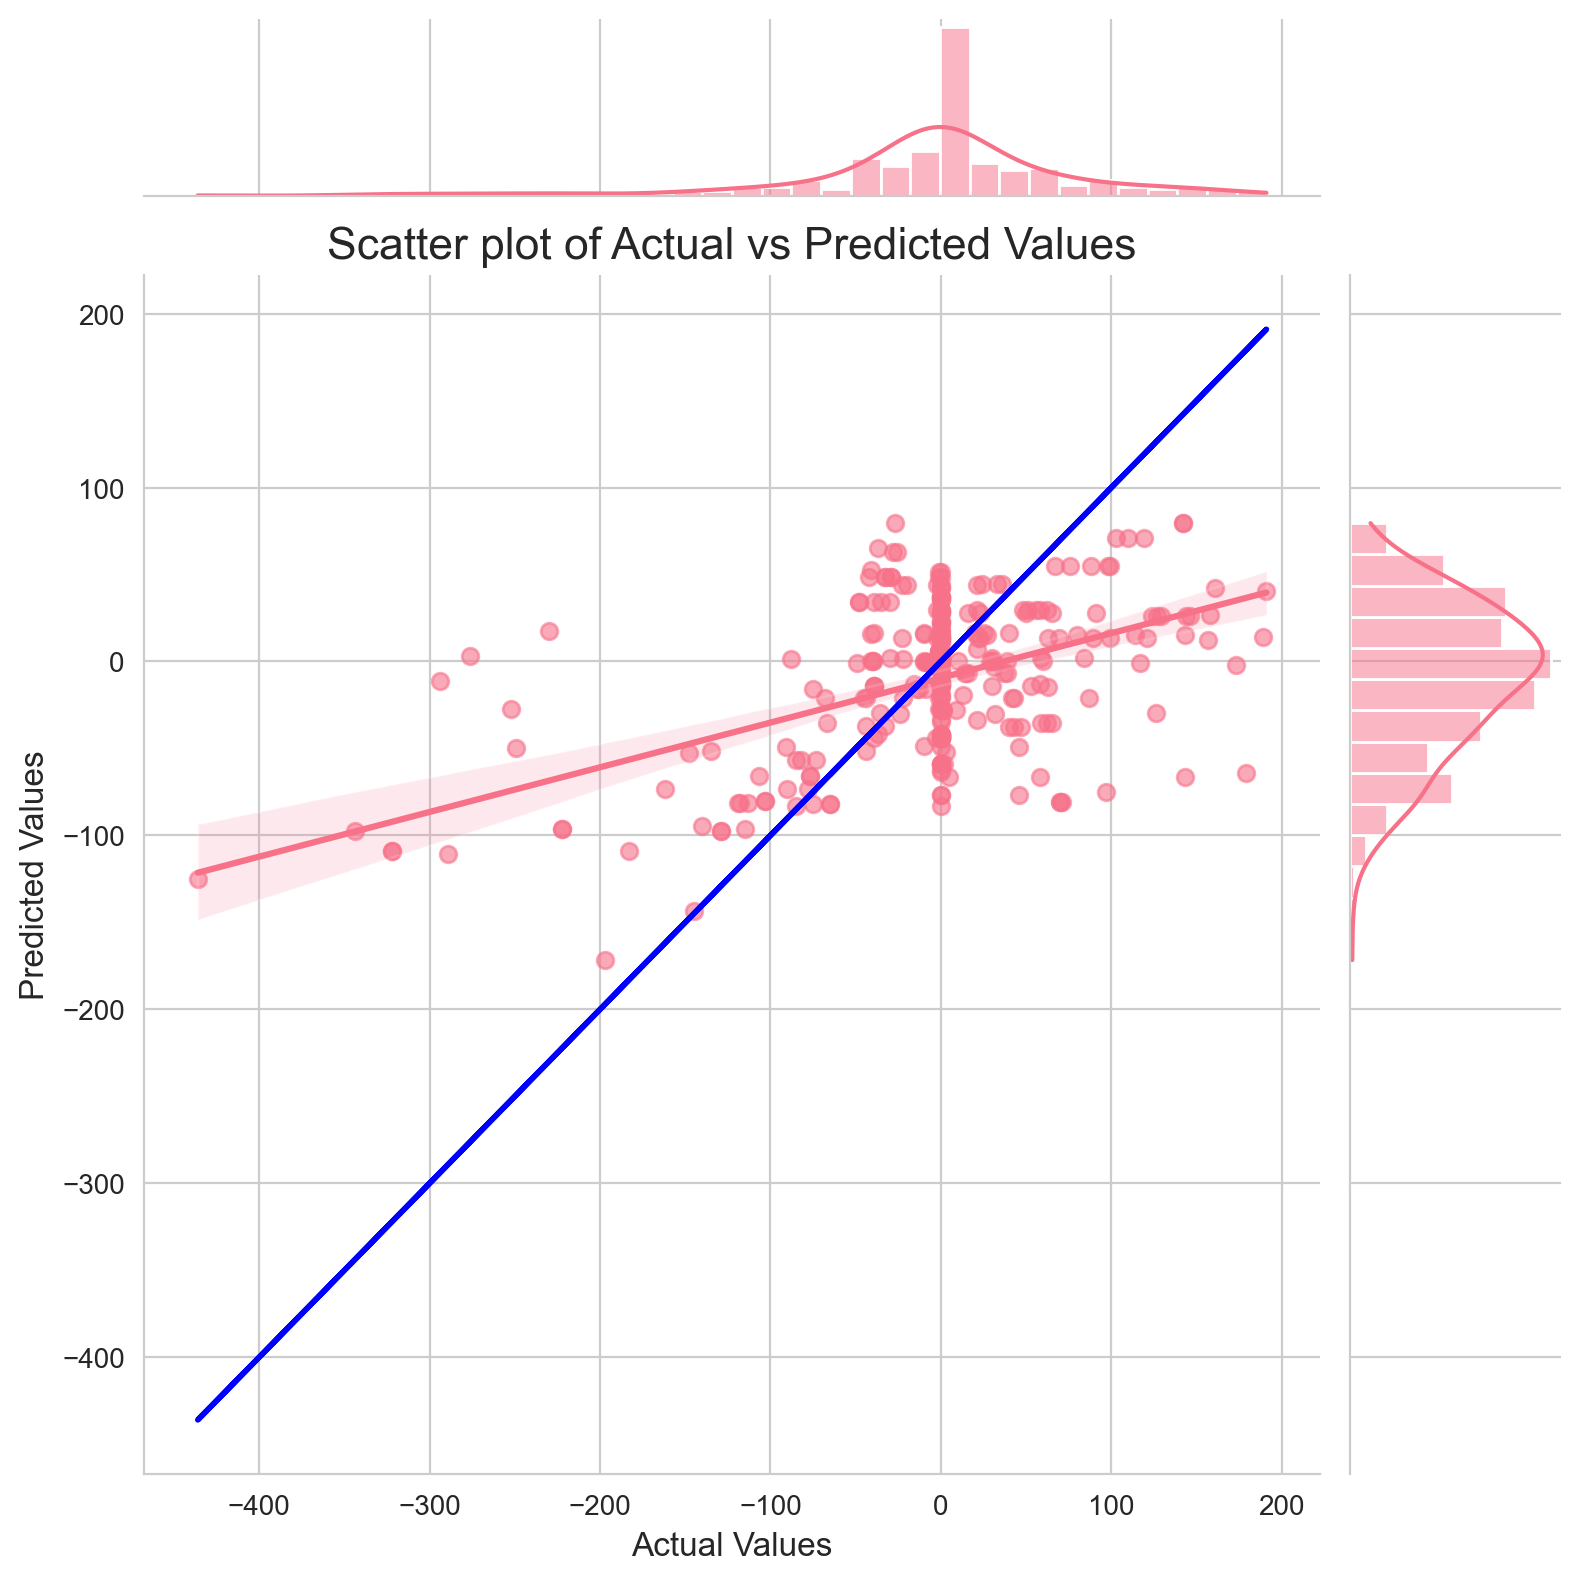

In [70]:

# גרף התפלגות ערכים צפויים מול ערכים בפועל
plt.figure(figsize=(5, 5))
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_test, y=y_pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
plt.plot(y_test, y_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()


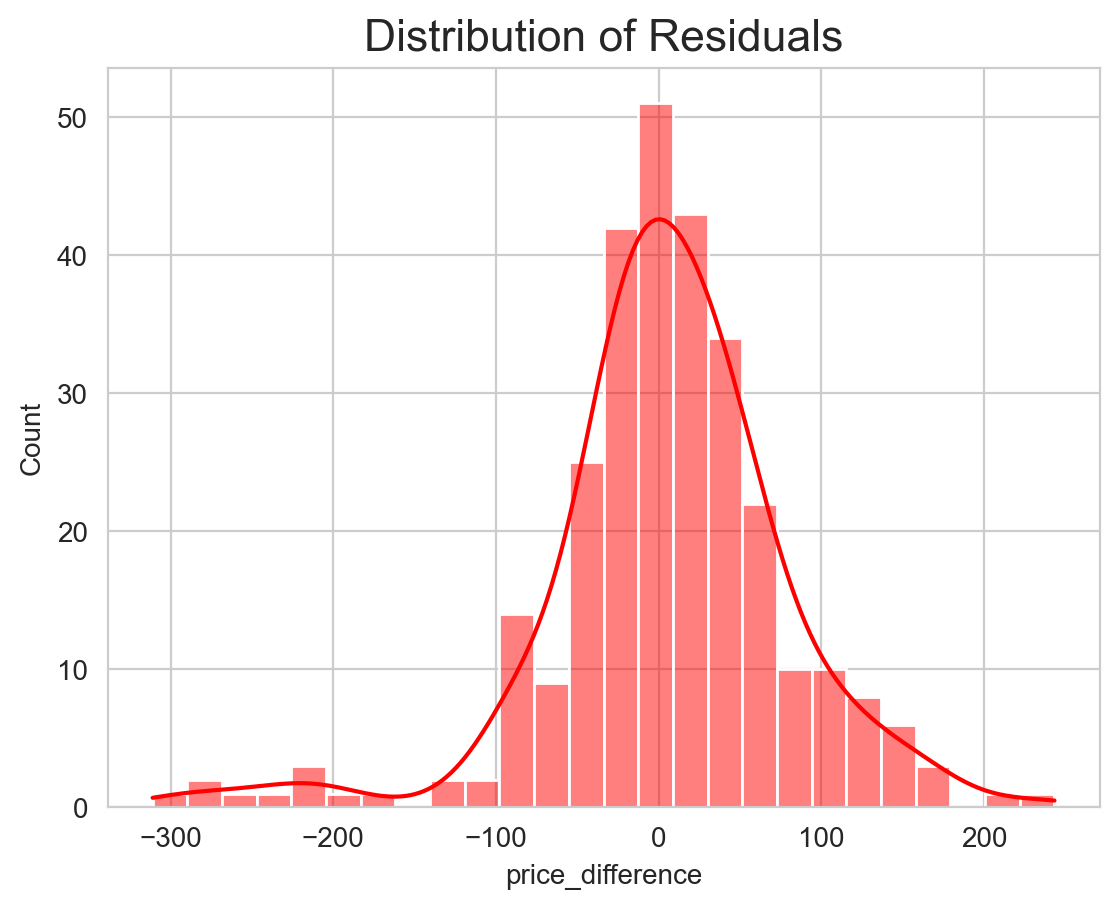

In [71]:
# גרף התפלגות שאריות (Residuals)
resid = y_test - y_pred_test
sns.histplot(resid, kde=True, color='red')
plt.title("Distribution of Residuals", fontsize=16)
plt.show()

In [72]:
##מודל SVR 

In [73]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

# הגדרת מודל SVR
svr_model = SVR(kernel='rbf', C=1.0)

# אימון המודל על סט האימון
svr_model.fit(x_train, y_train)

# הצגת ציון המודל בסט האימון
print("SVR Regressor")
print('__________________________________________________________')
print(f'SVR Regressor score on training data: {svr_model.score(x_train, y_train)}')


SVR Regressor
__________________________________________________________
SVR Regressor score on training data: -0.000989216547941485


In [74]:
# חיזוי נתונים בסט האימון ובסט הבדיקה
y_pred_train = svr_model.predict(x_train)
y_pred_test = svr_model.predict(x_test)


In [75]:
# חישוב מדדי שגיאות
mse = mean_squared_error(y_test, y_pred_test)
rmse = mse**0.5
r2_svr_model = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# הצגת מדדי השגיאות
print("Scores of the SVR Regressor on price:")
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2 Score: ", r2_svr_model)


Scores of the SVR Regressor on price:
MSE:  7376.482634161293
RMSE:  85.8864519826107
MAE:  51.231821602698986
R2 Score:  -0.00040638081006894033


<Figure size 500x500 with 0 Axes>

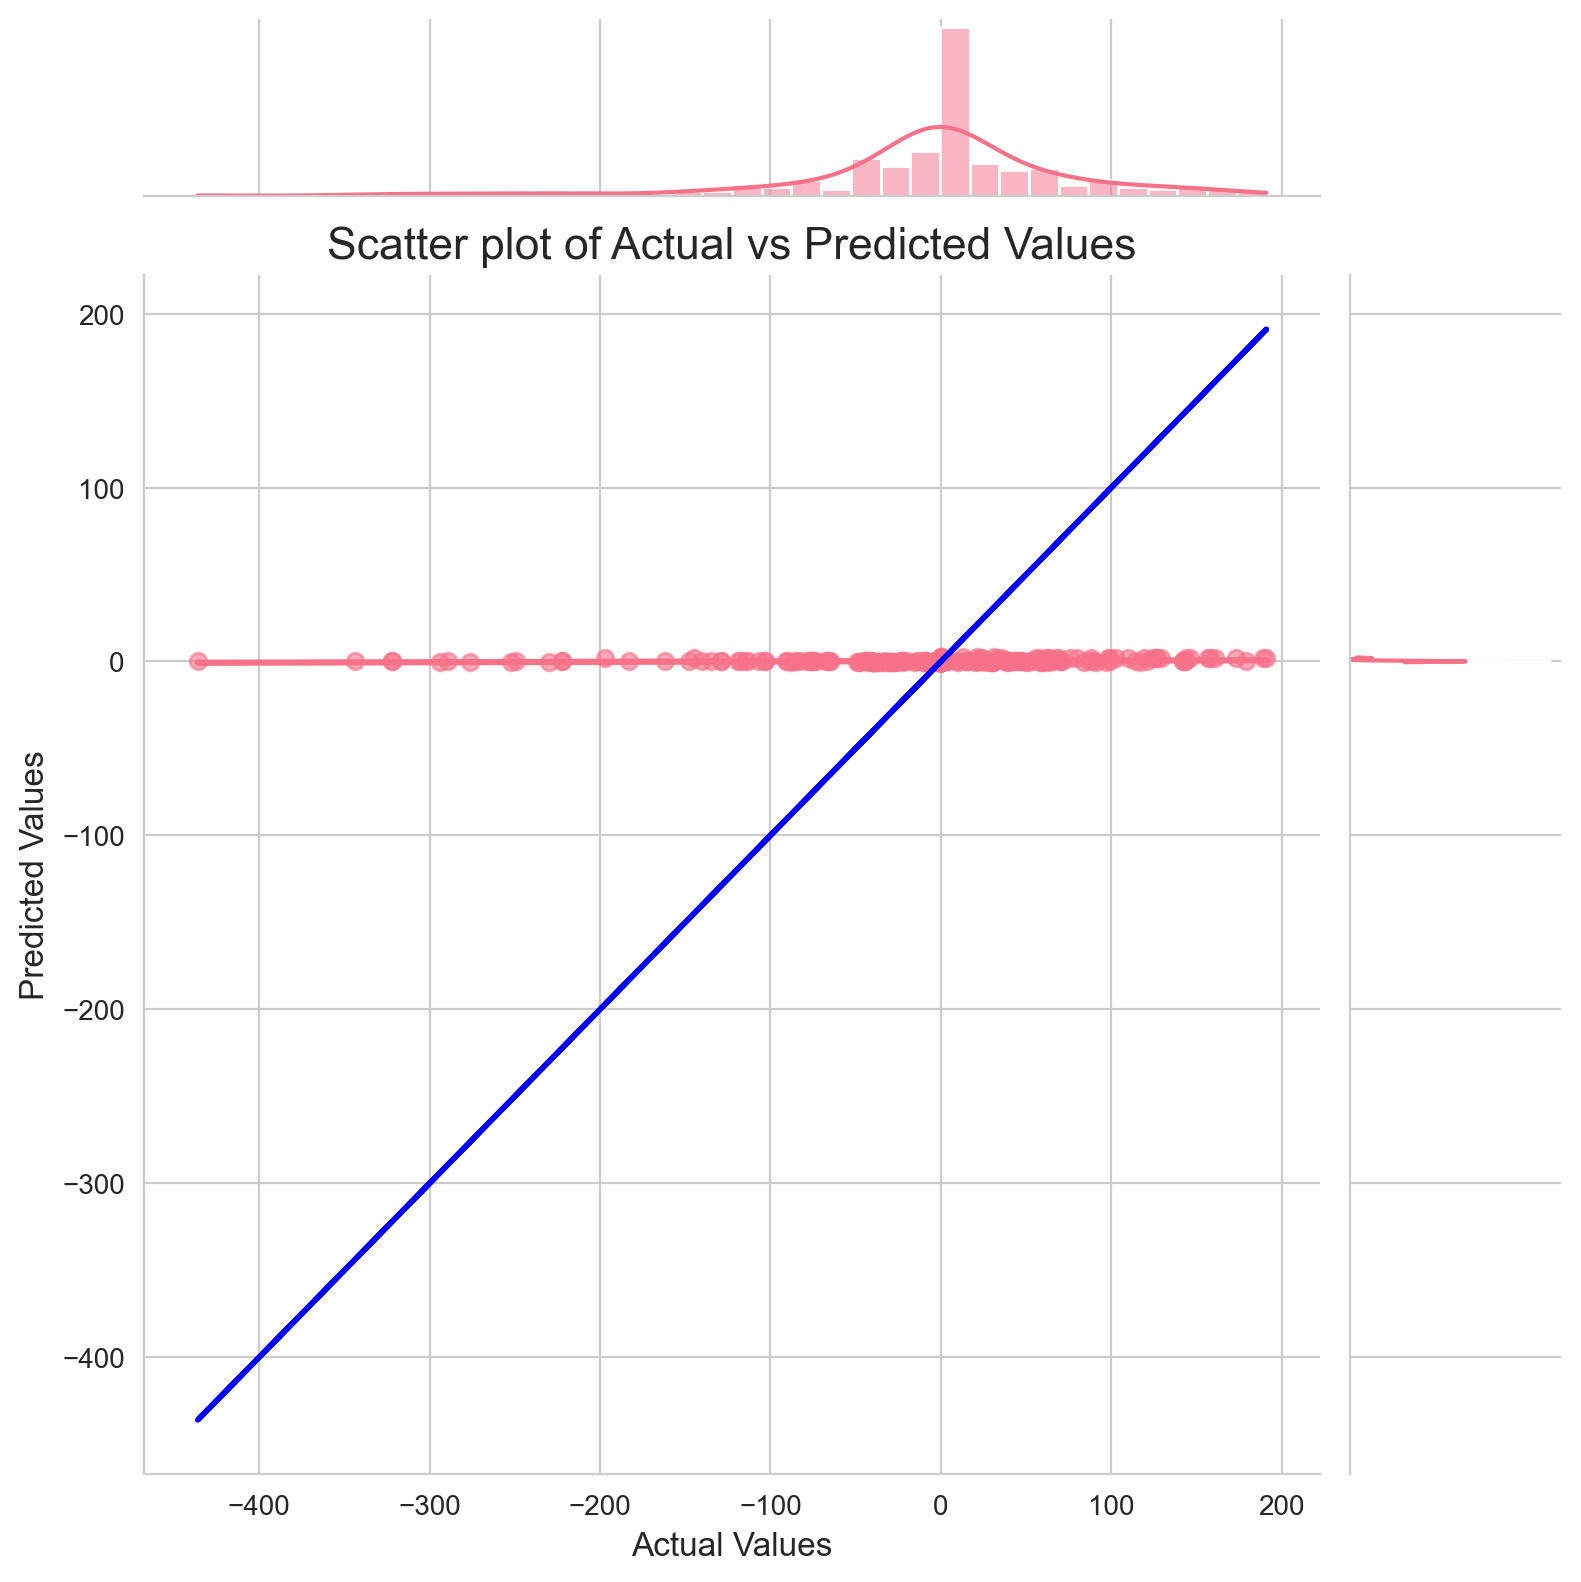

In [76]:
# גרף התפלגות ערכים צפויים מול ערכים בפועל
plt.figure(figsize=(5, 5))
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_test, y=y_pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
plt.plot(y_test, y_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()


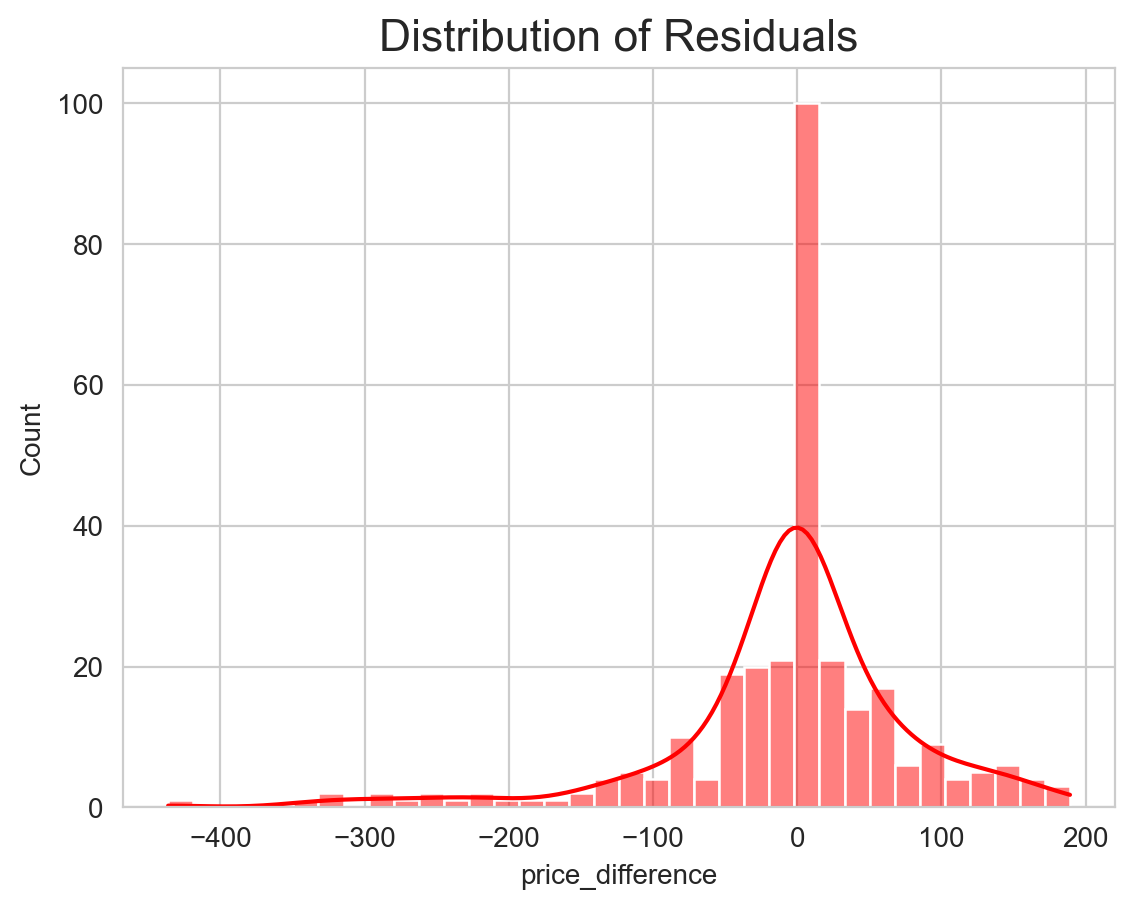

In [77]:

# גרף התפלגות שאריות (Residuals)
resid = y_test - y_pred_test
sns.histplot(resid, kde=True, color='red')
plt.title("Distribution of Residuals", fontsize=16)
plt.show()

In [103]:
#מסקנות:
#דיוק המודל: התוצאות מצביעות על כך שהמודל SVR אינו מתאים כלל לנתונים הנוכחיים. השגיאות גבוהות מאוד וה-R^2 Score שלילי, מה שמעיד על כך שהמודל גרוע מהמודל הבסיסי.
#שגיאות בחיזוי: ה-RMSE וה-MAE גבוהים מצביעים על כך שהמודל טועה משמעותית בחיזוי.
#ניסיון עם מודלים אחרים: כיוון שה-SVR אינו מספק תוצאות טובות, כדאי לנסות מודלים אחרי

In [106]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.75,random_state=42)

In [114]:
# הגדרת מודל Gradient Boosting Regressor
gp_model = GradientBoostingRegressor(
    alpha=0.95,
    learning_rate=0.1,
    loss='squared_error',  # שונה מ-'ls' ל-'squared_error' בהתאם לגרסה העדכנית של scikit-learn
    max_depth=9,
    max_features=0.45,
    min_samples_leaf=16,
    min_samples_split=6,
    n_estimators=100,
    subsample=1.0
)

# אימון המודל על סט האימון
# אימון המודל על סט האימון
gp_model.fit(x_train, y_train)


# הצגת ציון המודל בסט האימון
print("Gradient Boosting Regressor")
print('__________________________________________________________')
print(f'Gradient Boosting Regressor score on training data: {gp_model.score(x_train, y_train)}')


Gradient Boosting Regressor
__________________________________________________________
Gradient Boosting Regressor score on training data: 0.8828154362534735


In [116]:
gp_model.score(x_train, y_train)

0.8828154362534735

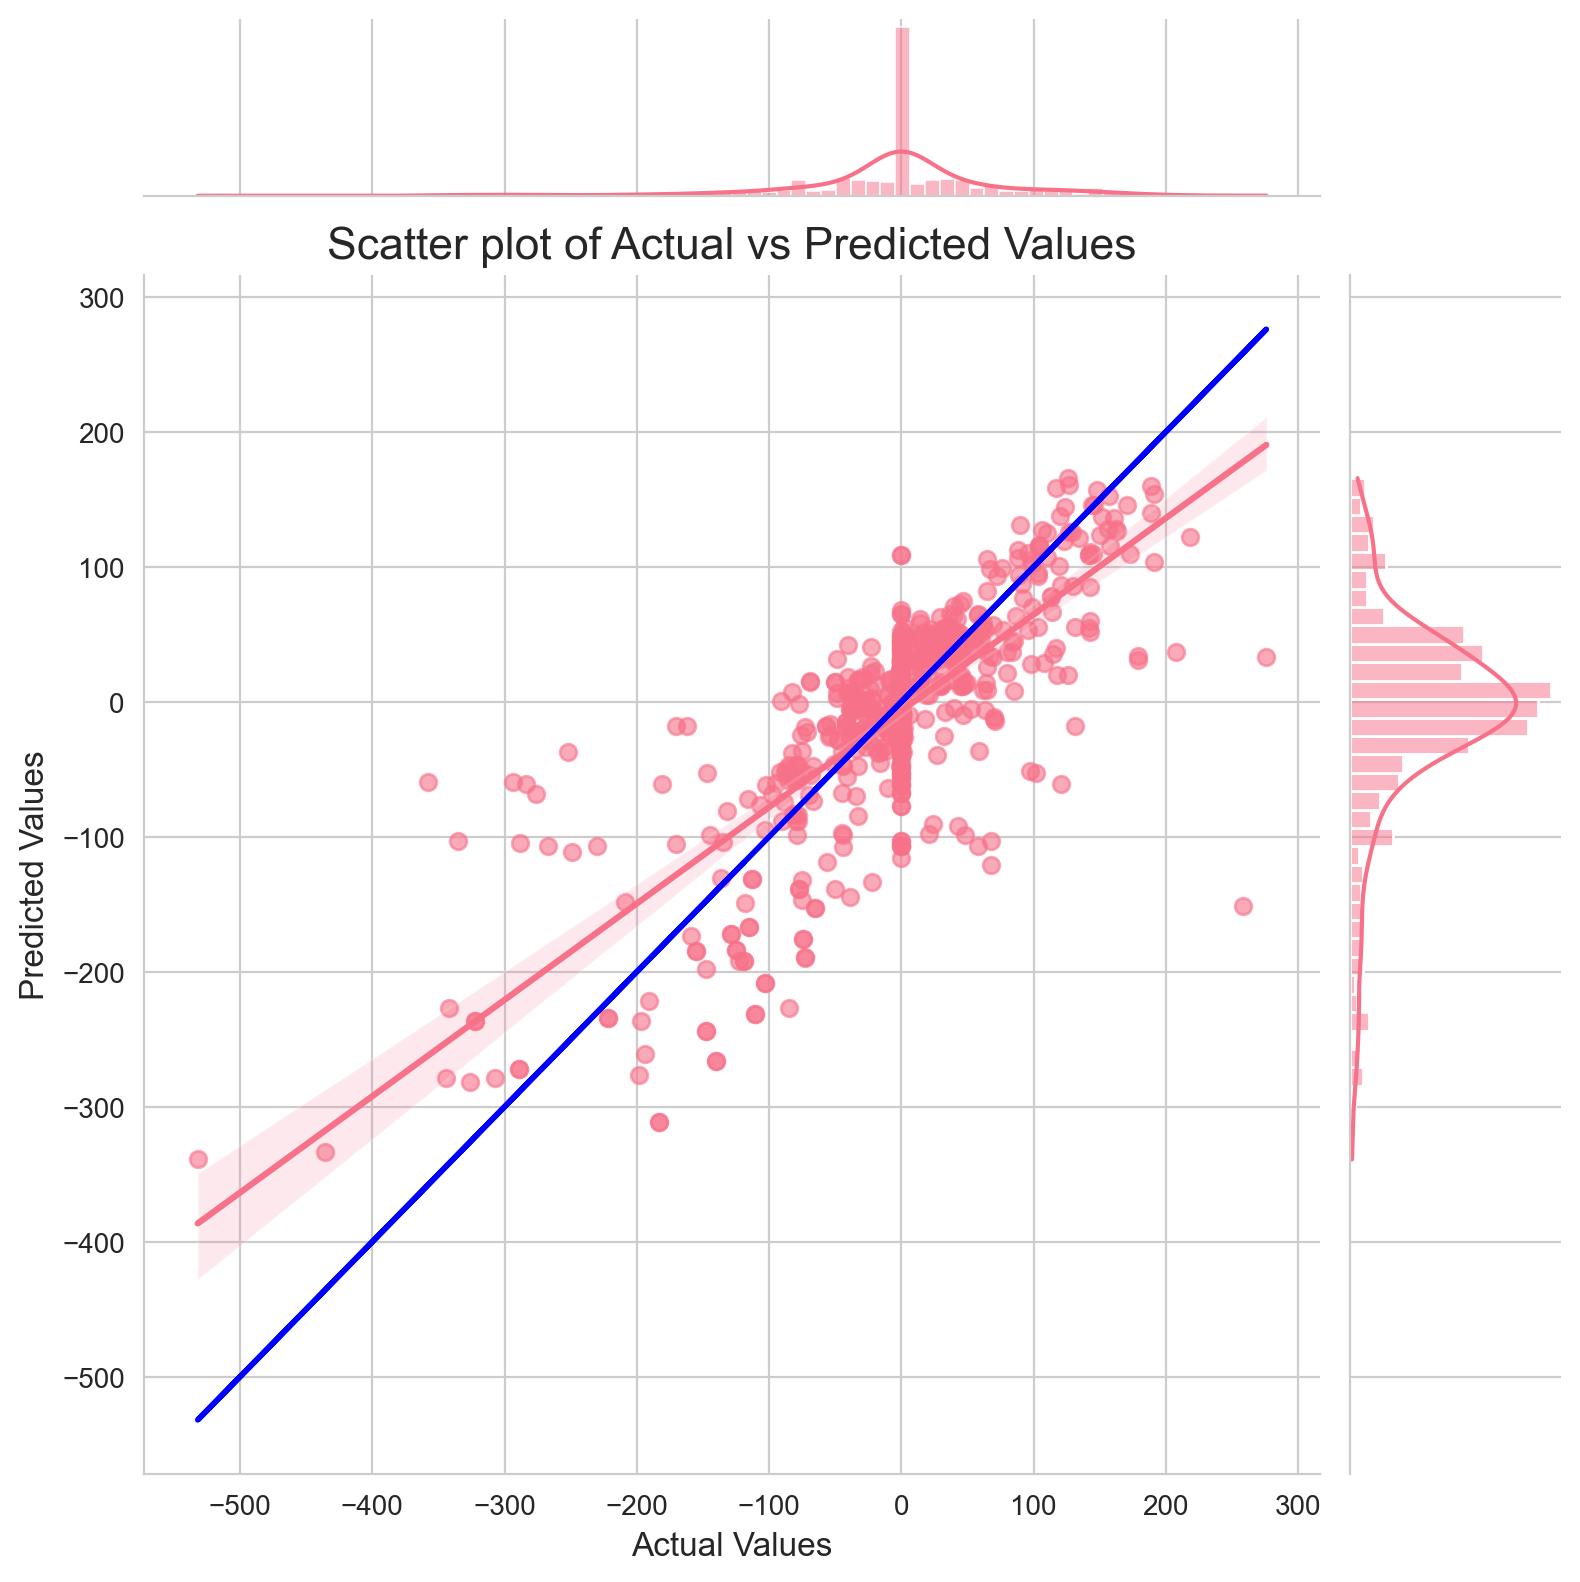

In [118]:
y_pred_train = gp_model.predict(x_train)
y_pred_test = gp_model.predict(x_test)

sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_test, y=y_pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
plt.plot(y_test, y_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()

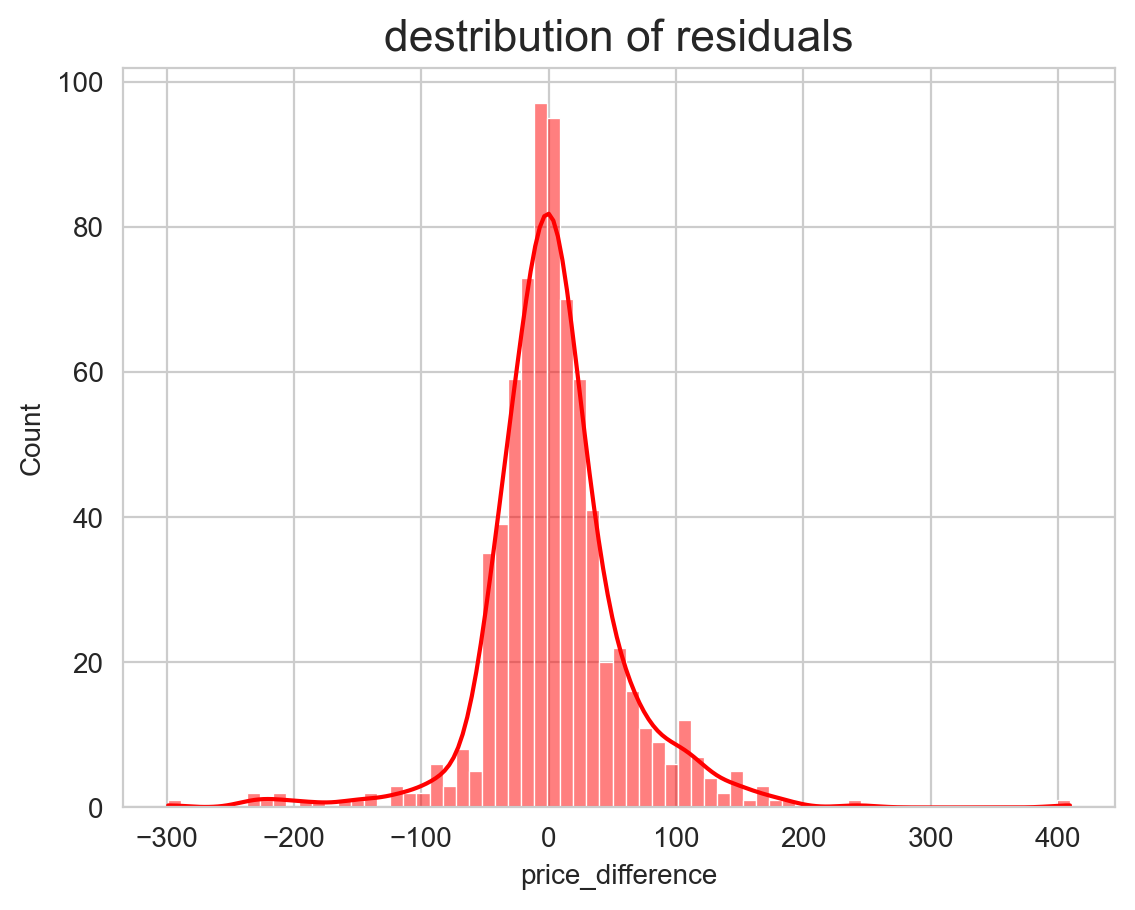

In [120]:
resid = y_test - y_pred_test
sns.histplot(resid,kde=True,color='red')
plt.title("destribution of residuals", fontsize=16)
plt.show()

In [122]:
mse = mean_squared_error(y_test,y_pred_test)
rmse = mse**0.5
r2_gp_score = r2_score(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
print("the scores of the gardient boosting on price: ")
print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", r2_gp_score)

the scores of the gardient boosting on price: 
mse:  3017.3620129372866
rmse:  54.93051986771368
mae:  35.62464567879962
r2_score:  0.5852384126831961


In [ ]:
#what we learn from this part:
# Because we deleted many data from both databases, we have some features that help us predict the price for each of them even though we have the same hotels with the same name, and we enter the exact date for the same period of time' the prediction based on the different website isn’t sound off.
# as a further traveler we now know that we better get our hotel from booking because we can see that it’s more often cheaper from Expedia